In [1]:
import pandas as pd

In [2]:
categories = {
    "00-10": ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10"],
    "11-13": ["11", "12", "13"],
    "14-20": ["14", "15", "16", "17", "18", "19", "20"],
    "21-23": ["21", "22", "23"],
    "24-27": ["24", "25", "26", "27"],
    "28": ["28"],
    "29-31": ["29", "30", "31"],
    "32-35": ["32", "33", "34", "35"],
    "36-38": ["36", "37", "38"],
    "39-45": ["39", "40", "41", "42", "43", "44", "45"],
    "46-51": ["46", "47", "48", "49", "50", "51"],
    "52-57": ["52", "53", "54", "55", "56", "57"],
    "58-62": ["58", "59", "60", "61", "62"],
    "63-66": ["63", "64", "65", "66"],
    "67": ["67"],
    "68-70": ["68", "69", "70"],
    "71-73": ["71", "72", "73"],
    "74-75": ["74", "75"],
    "76-77": ["76", "77"],
    "78": ["78"],
    "79": ["79"],
    "80-83": ["80", "81", "82", "83"],
    "84-95": ["84", "85", "86", "87", "88", "89", "90", "91", "92", "93", "94", "95"],
    "96-99": ["96", "97", "98", "99"],
    "V01-V09": ["V01", "V02", "V03", "V04", "V05", "V06", "V07", "V08", "V09"],
    "V10-V19": ["V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19"],
    "V20-V29": ["V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29"],
    "V30-V39": ["V30", "V31", "V32", "V33", "V34", "V35", "V36", "V37", "V38", "V39"],
    "V40-V49": ["V40", "V41", "V42", "V43", "V44", "V45", "V46", "V47", "V48", "V49"],
    "V50-V59": ["V50", "V51", "V52", "V53", "V54", "V55", "V56", "V57", "V58", "V59"],
    "V60-V69": ["V60", "V61", "V62", "V63", "V64", "V65", "V66", "V67", "V68", "V69"],
    "V70-V82": ["V70", "V71", "V72", "V73", "V74", "V75", "V76", "V77", "V78", "V79", "V80", "V81", "V82"],
    "V83-V84": ["V83", "V84"],
    "V85-V85": ["V85"],
    "V86-V86": ["V86"],
    "V87-V87": ["V87"],
    "V88-V88": ["V88"],
    "V89-V89": ["V89"],
    "V90-V90": ["V90"],
    "V91-V91": ["V91"],
    "E00-E09": ["E00", "E01", "E02", "E03", "E04", "E05", "E06", "E07", "E08", "E09"]
}


In [3]:
one_sym = pd.read_json('one.json').reset_index()
one_sym.head()

,index,short_codes,Symptoms
0,0,"41401,9971,4111,42731,4019,2720",[exertional chest pain]
1,1,"80508,5070,99739,5180,2939,2513,E8130,8820,401...",[neck pain]
2,2,"1541,99811,V6441,45829,25000,2724,4019,41400,V...",[rectal cancer]
3,3,"44101,42833,4233,5601,5990,4241,7885,2875,3272...",[chest pain radiating to back]
4,4,"41401,4139,4019,2724,45829,V4582,V1582",[chest pain]


In [4]:
one_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        100 non-null    int64 
 1   short_codes  100 non-null    object
 2   Symptoms     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
two_sym = pd.read_json('two.json').reset_index()
three_sym = pd.read_json('three.json').reset_index()
gt3_sym = pd.read_json('gt3.json').reset_index()

In [6]:
gt3_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        100 non-null    int64 
 1   short_codes  100 non-null    object
 2   Symptoms     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
def merge_category(df):

    df = df.drop('short_codes', axis=1)

    df = df.groupby('index').agg({
        'Category': lambda x: ','.join(map(str, x)),
        'Symptoms': 'first'
    }).reset_index()
    
    return df

In [8]:
def category_addition(df, categories = categories) : 
    icd9_to_category = {code: category for category, codes in categories.items() for code in codes}
    df['short_codes'] = df['short_codes'].astype(str).str.zfill(2)
    df['Category'] = df['short_codes'].map(icd9_to_category)
    return df

In [9]:
def preprocessing(test_df) : 
    test_df.loc[
        test_df['short_codes'].str.startswith("V"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[
        test_df['short_codes'].str.startswith("E"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[(~test_df.short_codes.str.startswith("E")) & (
        ~test_df.short_codes.str.startswith("V")), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:2])
    return test_df

In [10]:
def xplode(df) : 
    df = df.assign(short =df['short_codes'].str.split(',')).explode('short').reset_index(drop = True)
    df = df.drop('short_codes' ,axis =1)
    df.columns = ['index','Symptoms', 'short_codes']
    return df

one_sym = merge_category(category_addition(preprocessing(xplode(one_sym))))

In [11]:
one_sym 

,index,Category,Symptoms
0,0,"39-45,96-99,39-45,39-45,39-45,24-27",[exertional chest pain]
1,1,"80-83,46-51,96-99,46-51,29-31,24-27,nan,84-95,...",[neck pain]
2,2,"14-20,96-99,V60-V69,39-45,24-27,24-27,39-45,39...",[rectal cancer]
3,3,"39-45,39-45,39-45,52-57,58-62,39-45,78,28,32-3...",[chest pain radiating to back]
4,4,"39-45,39-45,39-45,24-27,39-45,V40-V49,V10-V19",[chest pain]
...,...,...,...
95,95,"39-45,74-75,58-62,32-35,39-45,39-45",[mild dyspnea on exertion]
96,96,"39-45,52-57,nan,28,24-27,24-27,V50-V59,36-38,5...",[loose bloody bowel movements]
97,97,"39-45,58-62,46-51,39-45,24-27,39-45,V40-V49",[enlarging 5.6 cm aneurysm of the infrarenal a...
98,98,"39-45,39-45,39-45,39-45,39-45,46-51,39-45,39-4...",[shortness of breath]


In [12]:
two_sym = merge_category(category_addition(preprocessing(xplode(two_sym))))

three_sym = merge_category(category_addition(preprocessing(xplode(three_sym))))

gt3_sym = merge_category(category_addition(preprocessing(xplode(gt3_sym))))

In [13]:
gt3_sym.head()

,index,Category,Symptoms
0,0,"84-95,46-51,46-51,39-45,00-10,96-99,80-83,80-8...","[chest pain, back pain, decreased breath sound..."
1,1,"46-51,29-31,24-27,29-31,24-27,V60-V69","[lethargic, unable to answer questions, normal..."
2,2,"39-45,39-45,46-51,39-45,00-10,78,78,39-45","[slurred speech, inability to move left arm an..."
3,3,"46-51,39-45,46-51,46-51,46-51,58-62,24-27,24-2...","[hypercarbic respiratory failure, coughing, in..."
4,4,"39-45,39-45,24-27,39-45,58-62,V40-V49,V10-V19","[unequal pulses in upper extremities, minimall..."


In [14]:
import os
import json

directory_path = 'samples_latest_all'
data = []

for filename in os.listdir(directory_path):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            file_data = json.load(file)
            data.append(file_data)

In [15]:
symptoms_df = pd.DataFrame(data)
raw_test_df = pd.read_csv('DIA_GROUPS_3_DIGITS_adm_test.csv')
raw_train_df = pd.read_csv('DIA_GROUPS_3_DIGITS_adm_train.csv')
raw_test_df = pd.merge(symptoms_df, raw_test_df, how='inner', on='id')
raw_test_df.head(3)

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,"2127,27800,4139,2859,53081,V1083,28860,V8533"
1,"[intermittent L-sided chest pressure, anterior...","[prostate ca s/p brachytherapy, PVD, h/o pancr...",193197,"True posterior wall infarction, initial episod...",CHIEF COMPLAINT: intermittent L-sided chest pr...,"True posterior wall infarction, initial episod...","True post infarct, init,Ac posthemorrhag anemi...",Admission Date: [**2144-2-23**] ...,"41061,2851,41401,4439,V1046,25000"
2,"[palpitations, dizziness, shortness of breath,...","[mitral regurgitation, mitral stenosis, hypert...",157736,"Mitral stenosis with insufficiency,Other chron...",CHIEF COMPLAINT: mitral regurgitation/stenosis...,"Mitral stenosis with insufficiency,Other chron...","Mitral stenosis w insuff,Chr pulmon heart dis ...",Admission Date: [**2197-10-10**] ...,"3942,4168,27800,42731,311,4019,24200"


In [16]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33994 entries, 0 to 33993
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 33994 non-null  int64 
 1   text               33994 non-null  object
 2   long_texts         33994 non-null  object
 3   short_texts        33994 non-null  object
 4   discharge_summary  33994 non-null  object
 5   short_codes        33994 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [17]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           8733 non-null   object
 1   Diseases           8733 non-null   object
 2   id                 8733 non-null   int64 
 3   icd_9_desc         8733 non-null   object
 4   text               8733 non-null   object
 5   long_texts         8733 non-null   object
 6   short_texts        8733 non-null   object
 7   discharge_summary  8733 non-null   object
 8   short_codes        8733 non-null   object
dtypes: int64(1), object(8)
memory usage: 614.2+ KB


In [18]:
test_df = raw_test_df.copy()
train_df = raw_train_df.copy()

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           8733 non-null   object
 1   Diseases           8733 non-null   object
 2   id                 8733 non-null   int64 
 3   icd_9_desc         8733 non-null   object
 4   text               8733 non-null   object
 5   long_texts         8733 non-null   object
 6   short_texts        8733 non-null   object
 7   discharge_summary  8733 non-null   object
 8   short_codes        8733 non-null   object
dtypes: int64(1), object(8)
memory usage: 614.2+ KB


In [20]:
test_df = test_df.assign(short_codes=test_df['short_codes'].str.split(',')).explode('short_codes').reset_index(drop =True)

In [21]:
train_df = train_df.assign(short_codes=train_df['short_codes'].str.split(',')).explode('short_codes').reset_index(drop =True)

In [22]:
test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,2127
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27800
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,4139
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,2859
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53081


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370851 entries, 0 to 370850
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 370851 non-null  int64 
 1   text               370851 non-null  object
 2   long_texts         370851 non-null  object
 3   short_texts        370851 non-null  object
 4   discharge_summary  370851 non-null  object
 5   short_codes        370851 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.0+ MB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98026 entries, 0 to 98025
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symptoms           98026 non-null  object
 1   Diseases           98026 non-null  object
 2   id                 98026 non-null  int64 
 3   icd_9_desc         98026 non-null  object
 4   text               98026 non-null  object
 5   long_texts         98026 non-null  object
 6   short_texts        98026 non-null  object
 7   discharge_summary  98026 non-null  object
 8   short_codes        98026 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.7+ MB


In [25]:


test_df = preprocessing(test_df)


In [26]:
train_df = preprocessing(train_df)

In [27]:
test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,21
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,41
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53


In [28]:
icd9_to_category = {code: category for category, codes in categories.items() for code in codes}


test_df['short_codes'] = test_df['short_codes'].astype(str).str.zfill(2)

test_df['Category'] = test_df['short_codes'].map(icd9_to_category)

test_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,21,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,27,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,41,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,28,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,53,52-57


In [29]:
train_df['short_codes'] = train_df['short_codes'].astype(str).str.zfill(2)

train_df['Category'] = train_df['short_codes'].map(icd9_to_category)

train_df.head()

,id,text,long_texts,short_texts,discharge_summary,short_codes,Category
0,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"Aortic valve disorders,Congestive heart failur...","Aortic valve disorder,CHF NOS,Hyperpotassemia,...",Admission Date: [**2141-3-13**] Dischar...,42,39-45
1,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"Aortic valve disorders,Congestive heart failur...","Aortic valve disorder,CHF NOS,Hyperpotassemia,...",Admission Date: [**2141-3-13**] Dischar...,42,39-45
2,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"Aortic valve disorders,Congestive heart failur...","Aortic valve disorder,CHF NOS,Hyperpotassemia,...",Admission Date: [**2141-3-13**] Dischar...,27,24-27
3,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"Aortic valve disorders,Congestive heart failur...","Aortic valve disorder,CHF NOS,Hyperpotassemia,...",Admission Date: [**2141-3-13**] Dischar...,99,96-99
4,159643,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This 60 ...,"Aortic valve disorders,Congestive heart failur...","Aortic valve disorder,CHF NOS,Hyperpotassemia,...",Admission Date: [**2141-3-13**] Dischar...,42,39-45


In [30]:
test_df    = test_df.drop(['icd_9_desc'	,'text','long_texts','short_texts','discharge_summary','short_codes' ], axis =1)
test_df.head()

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57


In [31]:
test_df.dropna(subset=['Category'], inplace=True)

train_df.dropna(subset=['Category'], inplace=True)



In [32]:
train_df    = train_df.drop(['text','long_texts','short_texts','discharge_summary','short_codes' ], axis =1)

In [33]:
train_df.head()

,id,Category
0,159643,39-45
1,159643,39-45
2,159643,24-27
3,159643,96-99
4,159643,39-45


In [34]:
raw_test_df =  test_df.groupby('id').agg({
    'Symptoms': 'first',
    'Diseases': 'first',
    'Category': lambda x: ','.join(map(str, x))
}).reset_index()

raw_test_df.head()

,id,Symptoms,Diseases,Category
0,100010,"[Gross hematuria, Weight loss, Fullness in lef...","[Metastatic renal cell carcinoma, Renal mass, ...","14-20,14-20,14-20,14-20,24-27"
1,100012,[exertional angina],"[coronary artery disease, hypertension, hyperc...","39-45,96-99,39-45,39-45,24-27,V10-V19,V40-V49,..."
2,100016,"[Respiratory failure, Labored breathing, Acces...","[Downs Syndrome, MRSA pneumonia, Tracheostomy,...","46-51,46-51,24-27,46-51,74-75,32-35,24-27,39-4..."
3,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
4,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"


In [35]:
raw_train_df =  train_df.groupby('id').agg({
    'Category': lambda x: ','.join(map(str, x))
}).reset_index()

raw_train_df.head()

,id,Category
0,100001,"24-27,32-35,58-62,52-57,V50-V59,52-57,39-45,39..."
1,100003,"52-57,28,00-10,52-57,39-45,52-57,39-45,52-57,78"
2,100006,"46-51,46-51,46-51,14-20,24-27,78,29-31,V10-V19..."
3,100007,"52-57,52-57,46-51,39-45"
4,100009,"39-45,96-99,24-27,24-27,V85-V85,39-45,V40-V49,..."


In [36]:
# len(set(classes).intersection(set(list(test_df.short_codes))))

In [37]:
test_df.Category.nunique()

38

In [38]:
train_df.Category.nunique()

40

> #### Check if the classes are in KG or not

In [39]:
import os
from py2neo import Graph
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from neo4j import GraphDatabase
from dotenv import load_dotenv
import json


uri = "neo4j://localhost:7687" 
auth = ("neo4j", "neo4j_pass5")

driver_1= GraphDatabase.driver(uri, auth=auth) 
driver_1.verify_connectivity()




#### Number of distinct disease codes in the knowledge graph

In [40]:
def count_distinct_disease_codes():
    with driver_1.session() as session:
        result = session.run("""
            MATCH (d:Disease)
            RETURN DISTINCT d.title AS distinct_disease
        """)
        distinct_diseases =  [i['distinct_disease'] for i in result.data()]
          
        return distinct_diseases

distinct_disease= count_distinct_disease_codes()
print(f"Number of distinct disease codes in the knowledge graph: {len(distinct_disease)}")


Number of distinct disease codes in the knowledge graph: 41


In [41]:
# len(set(distinct_disease).intersection(set(list(test_df.short_codes))))

In [42]:
# len(set(classes).intersection(set(list(test_df.short_codes))))

In [43]:
# sorted(list(test_df.short_codes.value_counts()))[-100:]

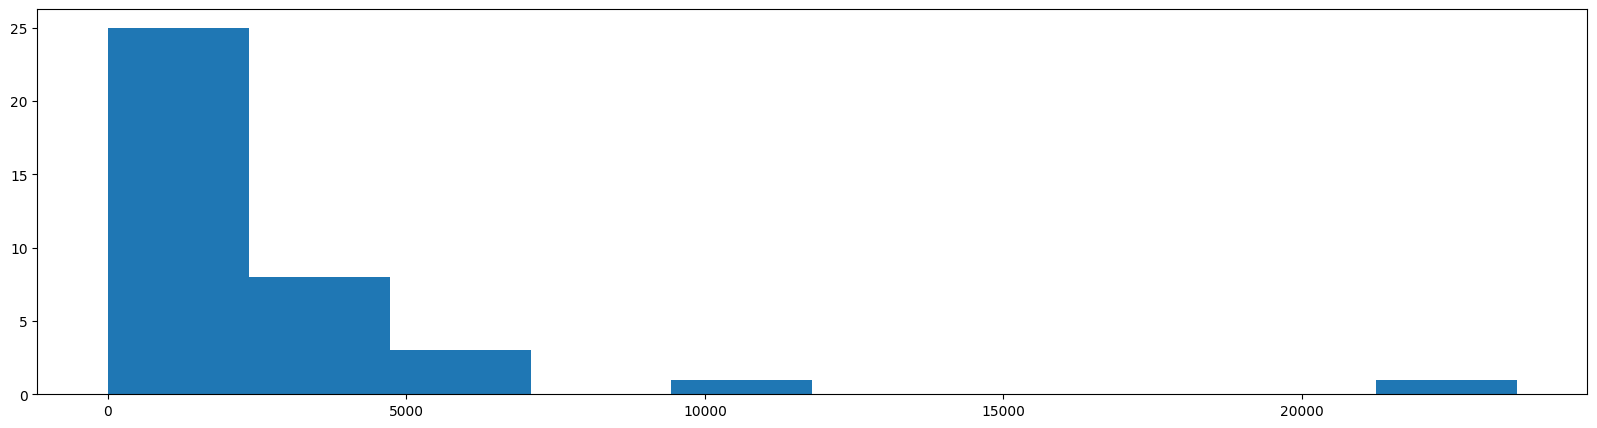

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.hist(list(test_df.Category.value_counts()))

plt.show()

> #### Infer all the classes with limit 1263 and weight!=1

In [45]:
test_df.head()

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57


In [46]:
all_short_codes = set(list(test_df.Category))
print(f'No. of Short Codes : {len(set(all_short_codes))}')
df_one_hot = pd.get_dummies(test_df, columns=['Category'])
df_one_hot.columns = df_one_hot.columns.str.replace('Category_', '')
df_one_hot = df_one_hot.drop(['Symptoms','Diseases'], axis =1).reset_index(drop=True)
df_one_hot = df_one_hot.astype(int)
df_one_hot.head()

No. of Short Codes : 38


,id,00-10,11-13,14-20,21-23,24-27,28,29-31,32-35,36-38,...,V30-V39,V40-V49,V50-V59,V60-V69,V70-V82,V83-V84,V85-V85,V87-V87,V88-V88,V90-V90
0,109136,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,109136,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109136,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,109136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> #### Check for the classes which are there, if classes as present, keep it, else make everything 0.

In [47]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [48]:
def get_prioritized_relationships(symptom_names, weightage=5, limit=20):
    with driver_1.session() as session:
        result = session.run(f"""
            MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms AND r.weight >= {weightage}
            WITH d.title AS disease_name, collect(s.name) AS symptoms, max(r.weight) AS max_weight
            RETURN disease_name, symptoms, max_weight
            ORDER BY max_weight DESC
            LIMIT {limit}
        """, symptoms=symptom_names)

        codes = []
        all_info = {}
        for record in result:
            codes.append(record['disease_name'])
            all_info[record['disease_name']] = [record['disease_name'], record['max_weight']]

            
        return codes, all_info
    

def create_binary_matrix(labels, classes):
    binary_matrix = np.zeros((len(labels), len(classes)), dtype=int)
    for i, label_list in enumerate(labels):
        for label in label_list:
            if label in classes:
                idx = classes.index(label)
                binary_matrix[i, idx] = 1       
    return binary_matrix
    
    
def roc_auc(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)
    y_score = probs
    if multilabel:
        dim_size = len(labels[0])
        mask = np.ones((dim_size), dtype=bool)
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask[c] = False
        labels = labels[:, mask]
        y_score = np.array(probs)[:, mask]

        filtered_cols = np.count_nonzero(mask == False)
        # print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


In [49]:
raw_test_df.Symptoms.iloc[1]

['exertional angina']

In [50]:
codes = get_prioritized_relationships(['back pain'], 1, 40)[0]

In [51]:
len(codes)

34

In [52]:
print(get_prioritized_relationships(['back pain'], 1,20 )[0])

['39-45', '28', '78', '58-62', '96-99', '46-51', '71-73', '24-27', '14-20', 'V40-V49', 'V50-V59', '80-83', '79', '29-31', '52-57', '00-10', '32-35', 'V10-V19', '68-70', '11-13']


In [53]:
print(get_prioritized_relationships(raw_test_df.Symptoms.iloc[1], 1000, 2000)[0])

[]


> #### Calculate AUROC score for all the present classes, neglect if not present 

In [54]:
icd_df = pd.read_csv('D_ICD_DIAGNOSES.csv')
icd_df.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [55]:
# icd_df[icd_df.short_codes.isin(codes)]

In [56]:
icd_df.columns = ['ROW_ID', 'short_codes', 'SHORT_TITLE', 'LONG_TITLE']

In [57]:
def preprocessing(test_df) : 
    test_df.loc[
        test_df['short_codes'].str.startswith("V"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[
        test_df['short_codes'].str.startswith("E"), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:3])
    test_df.loc[(~test_df.short_codes.str.startswith("E")) & (
        ~test_df.short_codes.str.startswith("V")), 'short_codes'] = test_df.short_codes.apply(
        lambda x: x[:2])
    return test_df

icd_df = preprocessing(icd_df)

In [58]:
icd_df.head()

,ROW_ID,short_codes,SHORT_TITLE,LONG_TITLE
0,174,01,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [59]:
test_df

,Symptoms,Diseases,id,Category
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,21-23
1,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,24-27
2,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,39-45
3,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,28
4,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,52-57
...,...,...,...,...
98021,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45
98022,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,32-35
98023,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45
98024,"[chest pain on exertion, marked ST segment dep...","[coronary artery disease, Hypertension, hyperl...",191701,39-45


In [60]:
value_counts_df = pd.DataFrame(test_df.Category.value_counts()).reset_index()

In [61]:
value_counts_df.head()

,Category,count
0,39-45,23598
1,24-27,11287
2,46-51,6835
3,52-57,6354
4,58-62,5202


In [62]:
list(value_counts_df.iloc[:10].Category)

['39-45',
 '24-27',
 '46-51',
 '52-57',
 '58-62',
 '29-31',
 '28',
 '96-99',
 '78',
 'V10-V19']

### Get all the true and predicted labels based on the input symptoms

In [63]:
classes = list(set(test_df.Category))

In [64]:
len(classes)

38

In [65]:
def escape_special_chars(query):
    return query.replace("'", "\\'").replace("/", "\\/")

def search_symptoms(query_strings):
    all_symptoms = []
    for query_string in query_strings:
        escaped_query = escape_special_chars(query_string)  # Escape the query string
        with driver_1.session() as session:
            result = session.run(
                f"CALL db.index.fulltext.queryNodes('symptomIndex', '{escaped_query}') "
                "YIELD node, score "
                "RETURN node.name AS symptom, score "
                "ORDER BY score DESC "
                "LIMIT 20"
            )
            symptoms = [record['symptom'] for record in result]
            all_symptoms.extend(symptoms)
    return all_symptoms

# Example usage
search_queries = ['headache', "extensive microcalcification's", 'nausea']
search_results = search_symptoms(search_queries)
print(search_results)

['HEADACHE', 'Headache', 'headache', 'Severe headache during headache episodes', 'Massive headache', 'Headache (migraine)', 'Dull headache', 'whole headache', 'worst headache', 'waxing headache', 'worse headache', 'vasospasm headache', 'Light headache', 'Migraine headache', 'headache-frontal', 'Mild Headache', 'holocranial headache', 'Mild headache', 'increased headache', 'worsening headache', 'Extensive fractures', 'Extensive injuries', 'Extensive bruising', 'Extensive supratentorial edema', 'Extensive cardiac history', 'Extensive pulmonary contusions', 'Extensive rib fractures', 'Extensive brain injury', 'Extensive superficial lacerations', 'Extensive blood loss', 'Extensive bilateral PEs', 'Extensive intraparenchymal hemorrhage', 'Extensive facial lacerations', 'Extensive smoking history', 'Extensive front end damage', 'Extensive left-sided injuries', 'Extensive vertebral compression fractures', 'Extensive soft tissue damage', 'extensive bleed during bronchoscopy', 'extensive necrot

In [66]:


true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==1 : 
                true_label = j.Category.split(',')
                true_labels.append(list(set(true_label)))
                expanded_query =  search_symptoms(list(j.Symptoms))
                pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 10)[0]
                predicted_labels.append(pred_labels)
               
        

0it [00:00, ?it/s]

8733it [00:06, 1356.23it/s]


In [67]:
# for i in range(1000) :
#     true_ =  true_labels[i]
#     pred = predicted_labels[i]
#     matching = set(true_labels[i]).intersection(set(predicted_labels[i]))
#     if  (len(true_) == len(matching) or len(pred) == len(matching)) and len(matching)>=5 : 
#         print(i)

In [68]:
i = 1
print(f'True : {sorted(true_labels[i])}, \nPredicted : {sorted(predicted_labels[i])},\nMatching : {sorted(set(true_labels[i]).intersection(set(predicted_labels[i])))}')

True : ['24-27', '39-45', '52-57', '78', '96-99'], 
Predicted : ['24-27', '28', '39-45', '46-51', '52-57', '58-62', '78', '96-99', 'V40-V49', 'nan'],
Matching : ['24-27', '39-45', '52-57', '78', '96-99']


In [69]:
    
true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")

AUROC Score: 0.5495522179041623


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [71]:
precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro')
precision

0.33973479652492

In [72]:
true_binary_matrix.shape

(224, 38)

In [73]:
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro')
recall

0.7206595538312318

In [74]:
f1_score_ = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro')
f1_score_

0.4617775015537601

In [75]:
print(f'AUROC Score :{auroc_score} ')
print(f'Precision Score :{precision} ')
print(f'Recall Score :{recall} ')
print(f'F1 Score :{f1_score_} ')

AUROC Score :0.5495522179041623 
Precision Score :0.33973479652492 
Recall Score :0.7206595538312318 
F1 Score :0.4617775015537601 


In [76]:
raw_test_df.iterrows()

<generator object DataFrame.iterrows at 0x34b8cb780>

In [77]:
raw_test_df

,id,Symptoms,Diseases,Category
0,100010,"[Gross hematuria, Weight loss, Fullness in lef...","[Metastatic renal cell carcinoma, Renal mass, ...","14-20,14-20,14-20,14-20,24-27"
1,100012,[exertional angina],"[coronary artery disease, hypertension, hyperc...","39-45,96-99,39-45,39-45,24-27,V10-V19,V40-V49,..."
2,100016,"[Respiratory failure, Labored breathing, Acces...","[Downs Syndrome, MRSA pneumonia, Tracheostomy,...","46-51,46-51,24-27,46-51,74-75,32-35,24-27,39-4..."
3,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
4,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"
...,...,...,...,...
8728,199971,"[Shortness of breath, Chest heaviness]","[Mitral regurgitation, Hypertension, Sleep apn...","39-45,28,71-73,39-45,24-27,78,V40-V49"
8729,199979,"[worsening severe aortic stenosis, peak gradie...","[aortic stenosis, chronic Afib, hypertension, ...","39-45,46-51,39-45,39-45,39-45,24-27,24-27,V50-..."
8730,199981,"[worsening shortness of breath, dyspnea on exe...","[coronary artery disease, diabetes mellitus ty...","96-99,58-62,58-62,46-51,58-62,39-45,39-45,39-4..."
8731,199984,"[Chest pain, UTI, Intermittent chest pressure,...","[Coronary Artery Disease, Urinary Tract Infect...","39-45,58-62,39-45,39-45,24-27,39-45,24-27,52-5..."


In [78]:
classes_oc = {}
for i in sorted(list(set(train_df.id.value_counts()))):
    classes_oc[i] =0
for i in list(train_df.id.value_counts())  : 
    classes_oc[i] += 1

In [79]:
sum=0
for i,j in classes_oc.items() : 
    sum+=j

sum

33994

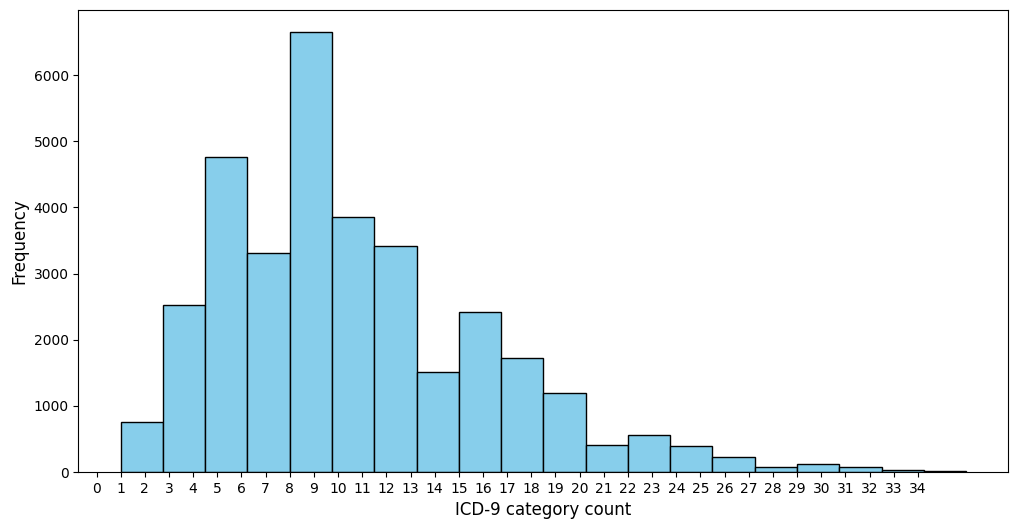

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.hist(train_df.id.value_counts(), bins=20, color='skyblue', edgecolor='black')

plt.xticks(range(0, 35))
plt.xlabel('ICD-9 category count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

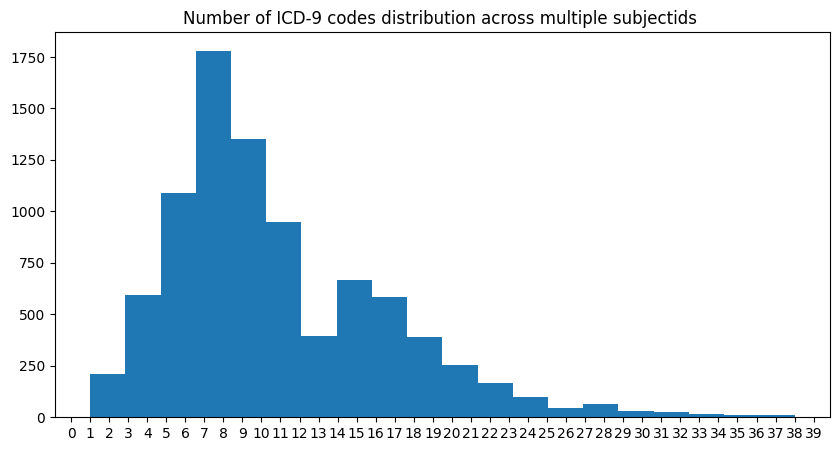

In [81]:
plt.figure(figsize=(10,5))
plt.hist(test_df.id.value_counts(),bins =20)
plt.xticks(range(0,40))
plt.title('Number of ICD-9 codes distribution across multiple subjectids ')
plt.show()

In [82]:
value_counts = test_df['id'].value_counts()

count_of_counts = value_counts.value_counts()


count_of_counts_dict = count_of_counts.to_dict()

# Display the dictionary
print("Dictionary of count of counts:\n", count_of_counts_dict)

Dictionary of count of counts:
 {8: 950, 9: 848, 7: 831, 6: 613, 10: 506, 11: 478, 5: 477, 12: 472, 13: 394, 4: 351, 14: 339, 16: 329, 15: 327, 17: 254, 3: 243, 18: 218, 19: 170, 20: 152, 2: 150, 21: 101, 22: 91, 23: 75, 1: 62, 24: 56, 26: 45, 25: 44, 27: 32, 28: 32, 29: 20, 31: 17, 30: 12, 32: 9, 33: 8, 36: 7, 37: 6, 34: 6, 38: 5, 35: 3}


In [83]:
precision_list = []
for i,j in count_of_counts_dict.items() : 
    if i <=8 : 
        precision = j/(j+count_of_counts_dict[8])
        precision_list.append(precision)
    else : 
        precision_list.append(1)
        

In [84]:
assert len(precision_list) == len(list(count_of_counts_dict.keys()))

In [85]:
np.mean(precision_list)

0.8516885026702594

In [86]:
sum(count_of_counts)

TypeError: 'int' object is not callable

In [87]:
np.median(list(test_df.id.value_counts()))

9.0

In [88]:
weightage_range = range(1,40)
limit_range = [41]

best_weightage = None
best_limit = None
best_auroc_score = -np.inf

for weightage in tqdm(weightage_range, desc='Weightage'):
    for limit in tqdm(limit_range, desc='Limit', leave=False):
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows(): 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships(j.Symptoms, weightage=weightage, limit=limit)[0]
            predicted_labels.append(pred_labels)
            if i == 100: 
                break
        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
        
        auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
        
        if auroc_score > best_auroc_score:
            best_auroc_score = auroc_score
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best AUROC Score: {best_auroc_score}")


Weightage:   3%|▎         | 1/39 [00:02<01:51,  2.92s/it]


KeyboardInterrupt: 

In [308]:
# weightage_range = [2,3,5,7,10,15,20] 
# limit_range = [4,5,6,7,8,9,10,12,15,20,25,30]
weightage_range = range(1,5)
limit_range = [10]

best_weightage = None
best_limit = None
best_recall_score = -np.inf


for weightage in tqdm(weightage_range, desc='Weightage'):
    for limit in tqdm(limit_range, desc='Limit', leave=False):
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows():
          if len(j.Symptoms) ==1:   
            true_label = j.Category.split(',')
            true_labels.append(true_label)
            expanded_query =  search_symptoms(list(j.Symptoms))
            pred_labels = get_prioritized_relationships(expanded_query, weightage=weightage, limit=limit)[0]
     
            predicted_labels.append(pred_labels)
      
        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
       
        recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro')
    
        if recall > best_recall_score:
            best_recall_score = recall
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best Recall Score: {best_recall_score}")


Weightage: 100%|██████████| 4/4 [00:22<00:00,  5.74s/it]

Best Weightage: 1
Best Limit: 10
Best Recall Score: 0.7206595538312318


In [485]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [307]:
# weightage_range = [2,3,5,7,10,15,20] 
# limit_range = [4,5,6,7,8,9,10,12,15,20,25,30]
weightage_range = [1]
limit_range = [5,10,15,20,25,30,35]

best_weightage = None
best_limit = None
best_precision_score = -np.inf

for limit in tqdm(limit_range, desc='Limit', leave=False):
    for weightage in tqdm(weightage_range, desc='Weightage'):
    
        
        true_labels = []
        predicted_labels = []
        
        for i, j in raw_test_df.iterrows(): 
           if len(j.Symptoms) ==1 : 
                true_label = j.Category.split(',')
                true_labels.append(true_label)
                expanded_query =  search_symptoms(list(j.Symptoms))
                pred_labels = get_prioritized_relationships(expanded_query, weightage=weightage, limit=limit)[0]
                predicted_labels.append(pred_labels)

        
        true_binary_matrix = create_binary_matrix(true_labels, classes)
        predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
        
        precision = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro')
        
   
        if precision > best_precision_score:
            best_precision_score = precision
            best_weightage = weightage
            best_limit = limit

print(f"Best Weightage: {best_weightage}")
print(f"Best Limit: {best_limit}")
print(f"Best Precision Score: {best_precision_score}")


Weightage: 100%|██████████| 1/1 [00:11<00:00, 11.32s/it]
                                                    

Best Weightage: 1
Best Limit: 5
Best Precision Score: 0.4720670391061452


> #### Check if the classes are in test dataset or not

In [213]:
classes = ['276', '428', '518', '038', '427', '584']  

def create_binary_matrix(labels, classes):
 
    binary_matrix = np.zeros((len(labels), len(classes)), dtype=int)
    

    for i, label_list in enumerate(labels):
        for label in label_list:
            if label in classes:
                idx = classes.index(label)
                binary_matrix[i, idx] = 1
                
    return binary_matrix

true_labels = [
    ['276', '498','034'],  
    ['427', '584','518']

]

predicted_labels = [
    ['276', '038','034'],  
    ['927', '427','518']

]

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
true_binary_matrix, predicted_binary_matrix

(array([[1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1]]),
 array([[1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0]]))

In [214]:
def roc_auc(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)

    y_score = probs

    if multilabel:

        dim_size = len(labels[0])
        
        mask = np.ones((dim_size), dtype=bool)
        
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask[c] = False

        labels = labels[:, mask]
        y_score = np.array(probs)[:, mask]
        
        print(labels)
        print(y_score)
        filtered_cols = np.count_nonzero(mask == False)
        print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")


[[1 0 0 0]
 [0 1 1 1]]
[[1 0 0 0]
 [0 1 1 0]]
2 columns not considered for ROC AUC calculation!
AUROC Score: 0.875


In [216]:
precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.5
Recall: 0.5
F1-Score: 0.5


# CODE RANGE ICD-9-CM SECTIONS

- **001-139** INFECTIOUS AND PARASITIC DISEASES (001-139)
- **140-239** NEOPLASMS (140-239)
- **240-279** ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)
- **280-289** DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)
- **290-319** MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS (290-319)
- **320-389** DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS (320-389)
- **390-459** DISEASES OF THE CIRCULATORY SYSTEM (390-459)
- **460-519** DISEASES OF THE RESPIRATORY SYSTEM (460-519)
- **520-579** DISEASES OF THE DIGESTIVE SYSTEM (520-579)
- **580-629** DISEASES OF THE GENITOURINARY SYSTEM (580-629)
- **630-679** COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM (630-679)
- **680-709** DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE (680-709)
- **710-739** DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE (710-739)
- **740-759** CONGENITAL ANOMALIES (740-759)
- **760-779** CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD (760-779)
- **780-799** SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS (780-799)
- **800-999** INJURY AND POISONING (800-999)
- **E000-E999** SUPPLEMENTARY CLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING (E000-E999)
- **V01-V91** SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES (V01-V91)


In [224]:
short_codes_inst = test_df.copy()

### Neoplasms

In [234]:
neoplasm_list = []
for i,j in test_df.iterrows() :
    try :
        j.short_codes = int(j.short_codes) 
        if (j.short_codes>=140) & (j.short_codes<=239) : 
            neoplasm_list.append(j)
    except : 
        continue

In [236]:
neoplasm_df = pd.DataFrame(neoplasm_list).reset_index(drop = True)
neoplasm_df.head()

,Symptoms,Diseases,id,icd_9_desc,text,long_texts,short_texts,discharge_summary,short_codes
0,"[chest tightness, palpitations, ventricular ec...","[aortic valve fibroelastoma, GERD, Basal Cell ...",109136,"Benign neoplasm of heart,Obesity, unspecified,...",CHIEF COMPLAINT: known aortic valve fibroelast...,"Benign neoplasm of heart,Obesity, unspecified,...","Benign neoplasm heart,Obesity NOS,Angina pecto...",Admission Date: [**2149-11-19**] ...,212
1,"[hematocrit drop, dark stool, melenotic-appear...","[left distal radius fracture, left ulna fractu...",109589,Closed fracture of lower end of radius with ul...,CHIEF COMPLAINT: fall\n\nPRESENT ILLNESS: [**A...,Closed fracture of lower end of radius with ul...,"Fx low radius w ulna-cl,Blood in stool,Thrombo...",Admission Date: [**2165-4-24**] ...,238
2,"[hematocrit drop, dark stool, melenotic-appear...","[left distal radius fracture, left ulna fractu...",109589,Closed fracture of lower end of radius with ul...,CHIEF COMPLAINT: fall\n\nPRESENT ILLNESS: [**A...,Closed fracture of lower end of radius with ul...,"Fx low radius w ulna-cl,Blood in stool,Thrombo...",Admission Date: [**2165-4-24**] ...,239
3,"[syncope, UGIB, melenotic stool, urge to have ...","[end stage renal disease, hypertension, hyperc...",161038,Chronic or unspecified gastric ulcer with hemo...,"CHIEF COMPLAINT: syncope, UGIB\n\nPRESENT ILLN...",Chronic or unspecified gastric ulcer with hemo...,"Chr stomach ulc w hem,Ac posthemorrhag anemia,...",Admission Date: [**2105-1-30**] ...,154
4,"[one day headache on the left, vomiting, incre...","[cerebellar astrocytoma, recurrence of tumor, ...",179776,Chronic viral hepatitis B without mention of h...,CHIEF COMPLAINT: \n\nPRESENT ILLNESS: The pati...,Chronic viral hepatitis B without mention of h...,"Hpt B chrn wo cm wo dlta,Pancreatic disorder N...",Admission Date: [**2195-8-26**] Dischar...,191


In [238]:
neoplasm_df.short_codes.nunique()

60

In [251]:
neoplasm_classes = list(set(neoplasm_df.short_codes))
print(neoplasm_classes)

[141, 142, 144, 145, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 161, 162, 163, 164, 171, 172, 173, 174, 180, 182, 183, 184, 185, 188, 189, 191, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 211, 212, 214, 215, 218, 220, 225, 227, 228, 230, 233, 235, 236, 237, 238, 239]


In [242]:
true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
    true_label = j.short_codes.split(',')
    true_labels.append(list(set(true_label)))
    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit = 8)[0]
    predicted_labels.append(pred_labels)


2686it [00:51, 51.96it/s]


['785', '441', '746', '424']

In [252]:
    
true_binary_matrix = create_binary_matrix(true_labels, neoplasm_classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, neoplasm_classes)

true_binary_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [253]:
predicted_binary_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:


def roc_auc_group(probs, labels, multilabel=False, average='macro', multi_class='ovo'):
    if isinstance(labels, list):
        labels = np.array(labels, dtype=int)
    else:
        labels = labels.astype(int)

    y_score = np.array(probs)

    if multilabel:
        mask_samples = np.any(labels > 0, axis=1)


        labels = labels[mask_samples]
        y_score = y_score[mask_samples]

 
        if labels.size == 0:
            print("No valid samples left after filtering. ROC AUC cannot be calculated.")
            return None
        
        dim_size = len(labels[0])
        mask_classes = np.ones((dim_size), dtype=bool)
        
        for c in range(dim_size):
            if max(labels[:, c]) == 0:
                mask_classes[c] = False

        labels = labels[:, mask_classes]
        y_score = y_score[:, mask_classes]
        
        filtered_cols = np.count_nonzero(mask_classes == False)
        print(f"{filtered_cols} columns not considered for ROC AUC calculation!")

    else:

        mask_samples = labels > 0
        
        labels = labels[mask_samples]
        y_score = y_score[mask_samples]

        if labels.size == 0:
            print("No valid samples left after filtering. ROC AUC cannot be calculated.")
            return None

    return roc_auc_score(y_true=labels, y_score=y_score, average=average, multi_class=multi_class)


In [90]:
neoplasm_classes = str(neoplasm_classes)[1:-1].split(', ')

NameError: name 'neoplasm_classes' is not defined

In [91]:
neoplasm_classes[0]

NameError: name 'neoplasm_classes' is not defined

In [92]:
    
true_binary_matrix = create_binary_matrix(true_labels, neoplasm_classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, neoplasm_classes)

auroc_score = roc_auc_group(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"AUROC Score: {auroc_score}")

NameError: name 'neoplasm_classes' is not defined

In [93]:
import json
from neo4j import GraphDatabase
from sklearn.metrics import precision_score, recall_score, f1_score

def parse_disease_classes(filepath):
    disease_class_map = {}
    with open(filepath, 'r') as file:
        lines = file.readlines()
        current_class = ""
        for line in lines:
            line = line.strip()
            if line.startswith('[') and line.endswith(']'):
                range_values = line[1:-1].split('-')
                start = int(range_values[0])
                end = int(range_values[-1]) + 1
                for i in range(start, end):
                    disease_class_map[str(i).zfill(2)] = current_class
            else:
                current_class = line
    # print(disease_class_map)
    return disease_class_map

class Neo4jEvaluator:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def query_diseases(self, symptoms):
        query = """
        MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms 
            WITH d.title AS disease_id, collect(s.name) AS symptoms, SUM(r.weight) AS total_weight
            RETURN disease_id, symptoms, total_weight
            ORDER BY total_weight DESC
            LIMIT 10
        """
        with self.driver.session() as session:
            result = session.run(query, symptoms=symptoms)
            return [record["disease_id"] for record in result]

    def evaluate(self, y_true, y_pred, disease_class_map):
        true_positive = 0
        for pred in y_pred:
            pred_class = disease_class_map.get(pred[:2])
            for actual in y_true:
                actual_class = disease_class_map.get(actual[:2])
                if pred_class == actual_class:
                    true_positive += 1
                    break

        precision = true_positive / len(y_pred) if y_pred else 0
        recall = true_positive / len(y_true) if y_true else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return precision, recall, f1

def load_data_from_json(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data





In [94]:
# uri = "bolt://localhost:7687"
# user = "neo4j"
# password = "neo4j_pass5"
# evaluator = Neo4jEvaluator(uri, user, password)
# raw_test_df.info()
# df_selected = raw_test_df[['Symptoms', 'Category']]
# json_result = df_selected.to_json(orient='records')
# data = json.loads(json_result)
# disease_class_map = parse_disease_classes("disease_classes.txt")
# precision_scores = []
# recall_scores = []
# f1_scores = []

# for entry in tqdm(data):
#     symptoms = entry["Symptoms"]
#     y_true = entry["Category"]

#     y_pred = evaluator.query_diseases(symptoms)

#     # Calculate precision, recall, and F1-score
#     precision, recall, f1 = evaluator.evaluate(y_true, y_pred, disease_class_map)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

#     # print(f"Symptoms: {symptoms}")
#     # print(f"Actual Diseases: {y_true}")
#     # print(f"Predicted Diseases: {y_pred}")
#     # print(f"Precision: {precision}")
#     # print(f"Recall: {recall}")
#     # print(f"F1-Score: {f1}")
#     # print("-" * 40)

# #averages
# avg_precision = sum(precision_scores) / len(precision_scores)
# avg_recall = sum(recall_scores) / len(recall_scores)
# avg_f1 = sum(f1_scores) / len(f1_scores)

# print(f"Average Precision: {avg_precision}")
# print(f"Average Recall: {avg_recall}")
# print(f"Average F1-Score: {avg_f1}")



## Single symptom

In [95]:
print(classes)

['V85-V85', '78', '46-51', 'V30-V39', '68-70', '28', '52-57', 'V87-V87', '58-62', 'V20-V29', 'V60-V69', '21-23', 'V40-V49', '39-45', '32-35', 'V10-V19', 'V88-V88', '96-99', '36-38', 'E00-E09', '67', '24-27', 'V01-V09', '11-13', '76-77', '71-73', '29-31', 'V50-V59', 'V83-V84', '63-66', '00-10', '79', '74-75', '14-20', '84-95', 'V70-V82', 'V90-V90', '80-83']


In [96]:
len(classes)

38

In [97]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==1 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            expanded_query =  search_symptoms(list(j.Symptoms))
            pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)

print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:13, 648.60it/s] 

Number of rows : 224
Macro Averaged AUROC Score: 0.5495522179041623
Micro Averaged Precision: 0.33973479652492
Micro Averaged Recall: 0.7206595538312318
Micro Averaged F1-Score: 0.4617775015537601
Macro Averaged Precision: 0.16415911774717362
Macro Averaged Recall: 0.32529917047768064
Macro Averaged F1-Score: 0.19732192648184893


## Double symptoms

In [287]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==2 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            expanded_query =  search_symptoms(list(j.Symptoms))
            pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:41, 210.94it/s]

Number of rows : 536
Macro Averaged AUROC Score: 0.5292708238781016
Micro Averaged Precision: 0.37345971563981045
Micro Averaged Recall: 0.7030692362598144
Micro Averaged F1-Score: 0.4878048780487805
Macro Averaged Precision: 0.16667003873234612
Macro Averaged Recall: 0.3016166819017126
Macro Averaged F1-Score: 0.1945520704594612


## Triple symptoms

In [288]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            expanded_query =  search_symptoms(list(j.Symptoms))
            pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [01:05, 133.41it/s]

Number of rows : 818
Macro Averaged AUROC Score: 0.5233297765562578
Micro Averaged Precision: 0.38566299368577445
Micro Averaged Recall: 0.6849164467897977
Micro Averaged F1-Score: 0.49346534653465346
Macro Averaged Precision: 0.1766166710784829
Macro Averaged Recall: 0.2957662683085834
Macro Averaged F1-Score: 0.19667737651655037


## More than three symptoms

In [304]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)>3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            expanded_query =  search_symptoms(cleaned_symptoms)
            pred_labels = get_prioritized_relationships(expanded_query,weightage=1,limit= 10 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

0it [00:00, ?it/s]


ClientError: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `db.index.fulltext.queryNodes`: Caused by: org.apache.lucene.queryparser.classic.ParseException: Encountered " "-" "- "" at line 1, column 5.
Was expecting one of:
    <BAREOPER> ...
    "(" ...
    "*" ...
    <QUOTED> ...
    <TERM> ...
    <PREFIXTERM> ...
    <WILDTERM> ...
    <REGEXPTERM> ...
    "[" ...
    "{" ...
    <NUMBER> ...
    }

| Type                       | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|----------------------------|----------------|----------------------------|--------------------------|-----------------------|-------------------------|--------------------------|-----------------------|-------------------------|
| Single Symptom              | 224            | 0.4723445909278866          | 0.16290212183436004       | 0.6925315227934045     | 0.26376062061322497      | 0.11825917706440202       | 0.43180014769528724    | 0.1590802227349518       |
| Two Symptoms                | 536            | 0.5202401454442502          | 0.18903730249226258       | 0.8283369022127052     | 0.30782493368700264      | 0.13995083123499627       | 0.6043024076921084     | 0.19748417282824415      |
| Three Symptoms              | 818            | 0.507191708694502           | 0.18194150063586265       | 0.9437115215479331     | 0.3050678797355889       | 0.14847040067553025       | 0.7469264629850801     | 0.21789116867971023      |
| More than Three Symptoms    | 7155           | 0.5158831933120694          | 0.22374881843496922       | 0.9513371423605831     | 0.36228934501501575      | 0.17221372751016636       | 0.7468493254495923     | 0.2476602454171145       |


### PubMED KG


In [98]:
uri = "neo4j://localhost:8687" 
auth = ("neo4j", "neo4j_pass7")

driver = GraphDatabase.driver(uri, auth=auth) 
driver.verify_connectivity()



In [99]:
import os
from py2neo import Graph
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from neo4j import GraphDatabase
from dotenv import load_dotenv
import json


driver = GraphDatabase.driver(uri, auth=auth) 
driver.verify_connectivity()

with open('mapped_terms_icd9.json', 'r') as file:
    data = file.read()  # Read the content of the file

# Parse the JSON data
parsed_data = json.loads(data)

result = {}

for key, values in parsed_data.items():
    filtered_diseases = {}
    for value in values:
        disease_info = value['disease'].split(' - ')
        disease_code = disease_info[0].strip()
        disease_desc = disease_info[1].strip()
        euclidean_distance = float(disease_info[2].strip())
        
        if disease_code not in filtered_diseases or filtered_diseases[disease_code]['euclidean_distance'] > euclidean_distance:
            filtered_diseases[disease_code] = {
                'disease_code': disease_code,
                'disease_desc': disease_desc,
                'euclidean_distance': euclidean_distance,
                'pos_weight': value['pos_weight']
            }
    
    result[key] = list(filtered_diseases.values())

with open('output_pubmed.json', 'w') as f:
    json.dump(result, f, indent=4)

In [100]:
def delete_all_data():
    with driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
        print("All data has been deleted.")

# delete_all_data()

In [101]:
for i,j in result.items():
    for k in j : 
        if  k['disease_code'].startswith("V") : 
            k['disease_code'] = k['disease_code'][:3]
        elif k['disease_code'].startswith("E") : 
            k['disease_code'] = k['disease_code'][:3]
        else :  k['disease_code'] =  k['disease_code'][:2]


In [102]:
# from tqdm import tqdm

# def create_graph(result):
#     with driver.session() as session:
#         for symptom, diseases in tqdm(result.items()):
#             for disease in diseases:
#                 try:
#                     # Extract attributes from disease data
#                     disease_code = disease['disease_code']
#                     euclidean_distance = float(disease['euclidean_distance'])
#                     pos_weight = int(disease['pos_weight'])
                    
#                     # Create or update Symptom node
#                     session.run("MERGE (s:Symptom {name: $name})", name=symptom)
                    
#                     # Create or update Disease node with attributes
#                     session.run("""
#                         MERGE (d:Disease {name: $name})
#                         ON CREATE SET d.disease_code = $disease_code
#                         ON MATCH SET d.disease_code = $disease_code
#                     """, name=disease['disease_code'], disease_code=disease_code)
                    
#                     # Create or update the relationship with attributes
#                     session.run("""
#                         MATCH (s:Symptom {name: $symptom}), (d:Disease {name: $disease_code})
#                         MERGE (s)-[r:ASSOCIATED_WITH]->(d)
#                         ON CREATE SET r.euclidean_distance = $euclidean_distance, r.pos_weight = $pos_weight
#                         ON MATCH SET r.euclidean_distance = $euclidean_distance, r.pos_weight = $pos_weight
#                     """, symptom=symptom, disease_code=disease_code, euclidean_distance=euclidean_distance, pos_weight=pos_weight)
#                 except Exception as e:
#                     print(f"An error occurred: {e}")

# create_graph(result)


In [103]:
def get_prioritized_relationships_pubmed(symptom_names, weightage=1, limit=40):
    with driver.session() as session:
        result = session.run(f"""
            MATCH (s:Symptom)-[r:ASSOCIATED_WITH]->(d:Disease)
            WHERE s.name IN $symptoms AND r.pos_weight >= $weightage
            RETURN s.name AS symptom, d.disease_code AS disease_name, r.pos_weight AS weight, r.euclidean_distance AS distance
            ORDER BY r.pos_weight DESC, r.euclidean_distance ASC
            LIMIT $limit
        """, symptoms=symptom_names, weightage=weightage, limit=limit)
        
        codes = []
        all_info = {}

        for record in result:
            codes.append(record['disease_name'])
            all_info[record['disease_name']] = [record['disease_name'], record['weight']]
            
        return codes, all_info


### Single Symptom

In [812]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==1 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20)[0]
            predicted_labels.append(pred_labels)

print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")

precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:00, 9235.41it/s] 

Number of rows : 224
Macro Averaged AUROC Score: 0.50084419195932
Micro Averaged Precision: 0.6666666666666666
Micro Averaged Recall: 0.0019398642095053346
Micro Averaged F1-Score: 0.0038684719535783366
Macro Averaged Precision: 0.05263157894736842
Macro Averaged Recall: 0.0014097744360902255
Macro Averaged F1-Score: 0.0027382430668322346


### Two Symptoms

In [786]:
len(classes)

38

In [815]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==2 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")

8733it [00:02, 3979.93it/s]

Number of rows : 536
Macro Averaged AUROC Score: 0.500670662489286
Micro Averaged Precision: 0.3448275862068966
Micro Averaged Recall: 0.0035688793718772305
Micro Averaged F1-Score: 0.007064641469445425
Macro Averaged Precision: 0.01864035087719298
Macro Averaged Recall: 0.002321981424148607
Macro Averaged F1-Score: 0.003976005762019045


### Three Symptoms

In [817]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)==3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20)[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [00:03, 2301.59it/s]

Number of rows : 818
Macro Averaged AUROC Score: 0.5006257544412546
Micro Averaged Precision: 0.37209302325581395
Micro Averaged Recall: 0.007036059806508356
Micro Averaged F1-Score: 0.013810962451445835
Macro Averaged Precision: 0.02046783625730994
Macro Averaged Recall: 0.0034880475772867715
Macro Averaged F1-Score: 0.005958210256406556


### More than three Symptoms

In [841]:
raw_test_df.head()

,id,Symptoms,Diseases,Category
0,100010,"[Gross hematuria, Weight loss, Fullness in lef...","[Metastatic renal cell carcinoma, Renal mass, ...","14-20,14-20,14-20,14-20,24-27"
1,100012,[exertional angina],"[coronary artery disease, hypertension, hyperc...","39-45,96-99,39-45,39-45,24-27,V10-V19,V40-V49,..."
2,100016,"[Respiratory failure, Labored breathing, Acces...","[Downs Syndrome, MRSA pneumonia, Tracheostomy,...","46-51,46-51,24-27,46-51,74-75,32-35,24-27,39-4..."
3,100019,"[heart murmur since childhood, increase in the...","[Bicuspid aortic valve, Dilated aorta, Aortic ...","39-45,74-75,39-45,78"
4,100028,"[Right upper quadrant pain, Fever, Elevated LF...","[Mild mental retardation, Cholangitis, Choledo...","52-57,00-10,46-51,52-57,96-99,39-45,28,84-95"


In [808]:

true_labels = []
predicted_labels = []

for i,j in tqdm(raw_test_df.iterrows()): 
        if len(j.Symptoms)>3 : 
            true_label = j.Category.split(',')
            true_labels.append(list(set(true_label)))
            pred_labels = get_prioritized_relationships_pubmed(j.Symptoms,weightage=1,limit= 20 )[0]
            predicted_labels.append(pred_labels)


print(f"Number of rows : {len(true_labels)}")

true_binary_matrix = create_binary_matrix(true_labels, classes)
predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)

auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
print(f"Macro Averaged AUROC Score: {auroc_score}")


precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


print(f"Micro Averaged Precision: {precision}")
print(f"Micro Averaged Recall: {recall}")
print(f"Micro Averaged F1-Score: {f1}")

print(f"Macro Averaged Precision: {precision_m}")
print(f"Macro Averaged Recall: {recall_m}")
print(f"Macro Averaged F1-Score: {f1_m}")


8733it [00:21, 402.20it/s]


Number of rows : 7155
Macro Averaged AUROC Score: 0.5004233387222278
Micro Averaged Precision: 0.3519870235198702
Micro Averaged Recall: 0.009428428667637026
Micro Averaged F1-Score: 0.018364928909952605
Macro Averaged Precision: 0.02301098936070341
Macro Averaged Recall: 0.0051244394857085625
Macro Averaged F1-Score: 0.008150787835512768


In [136]:
filtered_rows = []

for i, j in tqdm(raw_test_df.iterrows()): 
    if len(j.Symptoms) ==2: 
        
        true_label = j.Category.split(',')
        pred_labels = get_prioritized_relationships(j.Symptoms, weightage=1, limit=20)[0]
        
        # Convert to binary matrices
        true_binary_matrix = create_binary_matrix([true_label], classes)
        predicted_binary_matrix = create_binary_matrix([pred_labels], classes)
        
        # Calculate F1 score for this specific pair
        f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
        
        # Check if F1 score is greater than 0.8
        if f1 > 0.6:
            filtered_rows.append(j)
            print(len(filtered_rows))
            print(true_label)
            print(pred_labels)
            print(j.Symptoms)
        
            

        if len(filtered_rows)==100: 
            break

# Create a new DataFrame with filtered rows
filtered_df = pd.DataFrame(filtered_rows)

print(f"Original number of rows: {len(raw_test_df)}")
print(f"Filtered number of rows (F1 > 0.6): {len(filtered_df)}")

817it [00:02, 615.06it/s]

1
['46-51', '58-62', '68-70', '29-31', '46-51', '29-31', '58-62', '68-70', '39-45', '24-27', '00-10', '28', '39-45', '24-27', 'V01-V09', '39-45', '39-45', '29-31', '24-27']
['39-45', '24-27', '28', '78', '58-62', '96-99', '52-57', '00-10', '79', '68-70', '29-31', '46-51', 'V40-V49', 'V10-V19', 'V50-V59', '14-20', '32-35', '71-73', '36-38', 'V01-V09']
['lethargy', 'hypoxia']


1330it [00:04, 398.00it/s]

2
['39-45', '58-62', '46-51', '39-45', '78', '58-62', 'V40-V49', '39-45', '28', '39-45', '24-27', '39-45', '24-27', 'V40-V49', 'V50-V59']
['39-45', '58-62', '24-27', '96-99', 'V50-V59', '78', 'V40-V49', '36-38', '46-51', '71-73', '79', '28', '00-10', 'V10-V19', '11-13', '32-35', '52-57', '29-31']
['VT storm', 'unable to extubate after VT ablation']


1506it [00:04, 454.76it/s]

3
['79', '58-62', '39-45', '52-57', '24-27', '78', '52-57', '39-45', '24-27', '28', '39-45', 'V40-V49', 'V10-V19', '29-31', '24-27', '28']
['96-99', '78', '28', '39-45', '00-10', '24-27', '46-51', '58-62', '52-57', 'V50-V59', '32-35', '79', 'V10-V19', '71-73', '29-31', 'V40-V49', '36-38', '68-70', '14-20', '84-95']
['hypotension', 'bright red blood per rectum']
4
['96-99', '00-10', '78', '58-62', '52-57', '00-10', '96-99', '58-62', '24-27', '24-27', '11-13', '68-70', '68-70', '78', '52-57', '52-57', 'V10-V19', '32-35', '29-31', '46-51', '28']
['96-99', '00-10', '46-51', '24-27', '78', '58-62', '52-57', '28', '68-70', '29-31', '39-45', '32-35', 'V40-V49', '11-13', '84-95', 'V50-V59', '79', 'V10-V19', '80-83', '71-73']
['Thigh pain', 'Sepsis']


2067it [00:06, 375.13it/s]

5
['39-45', '28', '39-45', '39-45', '68-70', '39-45', '39-45', '39-45', '96-99', '39-45', '58-62', 'V40-V49', '79', '29-31', 'V50-V59', 'V40-V49', '39-45', '39-45', 'V40-V49', '39-45', '24-27', '46-51']
['39-45', '96-99', '28', '78', '46-51', '52-57', 'V50-V59', '79', 'V10-V19', '29-31', '24-27', '71-73', '00-10', '32-35', '68-70', '58-62', '36-38', '80-83', '84-95', 'V40-V49']
['Chest pain', 'Worsening exertional angina']


2278it [00:06, 428.47it/s]

6
['39-45', '58-62', '96-99', '46-51', '39-45', '39-45', '32-35', '39-45', '24-27', '32-35', '71-73', 'V88-V88', 'V10-V19', 'V50-V59']
['24-27', '28', '39-45', '58-62', '78', '96-99', '52-57', '29-31', 'V50-V59', '46-51', '79', 'V10-V19', '00-10', 'nan', '71-73', '32-35', '36-38', '14-20', '74-75', '68-70']
['Decreased exercise tolerance', 'Fatigue']


2399it [00:07, 238.68it/s]

7
['00-10', '58-62', '46-51', '32-35', '39-45', '96-99', '58-62', '39-45', '52-57', '28', '39-45', '39-45', '24-27', '39-45', '24-27', '39-45', '39-45', '68-70', 'V40-V49', 'V40-V49', 'V40-V49']
['39-45', '96-99', '28', '78', '58-62', '46-51', '00-10', '52-57', '24-27', '79', 'V40-V49', '68-70', 'V50-V59', '29-31', '32-35', '71-73', '11-13', 'V10-V19', '36-38', '14-20']
['fever', 'hypotension']


2595it [00:07, 356.12it/s]

8
['46-51', '58-62', '46-51', '24-27', '46-51', '24-27', '00-10', '24-27', '32-35', '39-45', '00-10', '78', '39-45', '71-73', 'V50-V59', '46-51', '39-45', 'V40-V49', '39-45', '39-45', '52-57', '24-27', '32-35', '24-27', '24-27', '39-45']
['39-45', '24-27', '28', '58-62', '78', '96-99', '46-51', 'V40-V49', '29-31', 'V50-V59', '52-57', '79', 'nan', '68-70', 'V10-V19', '00-10', '71-73', '32-35', '74-75', '36-38']
['weakness', 'shortness of breath']


3386it [00:09, 468.05it/s]

9
['00-10', '78', '14-20', '58-62', '52-57', '96-99', '39-45', '58-62', '79', '71-73', '28', '28', '29-31', '71-73', 'V10-V19', 'V10-V19', 'V50-V59']
['24-27', '28', '96-99', '39-45', '78', '58-62', '52-57', '29-31', 'V40-V49', 'V50-V59', '79', '46-51', '00-10', '32-35', '68-70', '11-13', '71-73', '14-20', 'V10-V19', '80-83']
['Lethargy', 'Abdominal pain']
10
['52-57', '39-45', '39-45', '32-35', '28', '24-27', '24-27', '39-45', 'V40-V49', '21-23', 'V50-V59', '32-35', '39-45', 'V40-V49', '39-45', '52-57', '52-57', '29-31', '24-27', '24-27', '39-45', '58-62', 'V10-V19', 'V40-V49']
['28', '39-45', '52-57', '96-99', 'V40-V49', '58-62', '78', '14-20', '46-51', '29-31', 'V50-V59', 'V10-V19', '00-10', '21-23', '36-38', '24-27', '79', '68-70', 'V70-V82', '71-73']
['bright red blood per rectum', 'lower GI bleed']


3607it [00:10, 412.17it/s]

11
['96-99', '46-51', '39-45', 'V85-V85', '96-99', '71-73', '00-10', '24-27', '24-27', '24-27', '39-45', '29-31', '71-73', '52-57', '29-31', '24-27', '29-31', 'V10-V19', 'V40-V49', 'V40-V49', 'V50-V59', 'V50-V59']
['68-70', '24-27', '58-62', '96-99', '36-38', '39-45', '46-51', 'V50-V59', '52-57', '32-35', 'V10-V19', '71-73', '29-31', 'V40-V49', '84-95', '28', '00-10']
['wound dehiscence', 'bloody drainage']
12
['39-45', '39-45', '78', '24-27', '39-45', '79', '46-51', '39-45', '39-45', '28', '52-57', '24-27', '36-38', 'V40-V49']
['39-45', '24-27', '28', '96-99', '78', '58-62', '52-57', 'V40-V49', 'nan', 'V50-V59', '46-51', 'V10-V19', '29-31', '79', '36-38', '71-73', '68-70', '32-35', '00-10', '84-95']
['chest pain', 'back pain']
13
['39-45', '58-62', '14-20', '39-45', '96-99', '39-45', '24-27', '39-45', '68-70', '96-99', '39-45', 'V40-V49', '39-45', '24-27', 'V50-V59', 'V50-V59', '24-27', '79', '36-38', '28', '79', 'V40-V49', 'V40-V49']
['24-27', '78', '39-45', '28', '96-99', '36-38', '

4215it [00:11, 414.38it/s]

15
['39-45', '58-62', '96-99', '39-45', '24-27', '00-10', '24-27', '46-51', '24-27', '32-35', '78', '32-35', '39-45', '71-73', 'V70-V82', '28', 'V10-V19', 'V85-V85']
['39-45', '96-99', '28', '78', '46-51', '52-57', 'V50-V59', '79', 'V10-V19', '29-31', '24-27', '71-73', '00-10', '32-35', '68-70', '58-62', '36-38', '80-83', '84-95', 'V40-V49']
['Chest pain', 'Tenderness in chest and upper arm area']


4316it [00:12, 150.03it/s]

16
['96-99', '00-10', '96-99', '78', '46-51', '58-62', '96-99', '52-57', '39-45', '84-95', '96-99', '24-27', '24-27', 'V40-V49', 'V10-V19', '58-62', '39-45']
['96-99', '39-45', '78', '00-10', '24-27', '58-62', '28', '46-51', '52-57', 'V10-V19', '71-73', '32-35', '68-70', '79', '11-13', '36-38', '29-31', 'V50-V59', 'V40-V49', 'V60-V69']
['sepsis', 'multisystem organ failure']
17
['39-45', '58-62', '39-45', '24-27', '39-45', '58-62', '24-27', '39-45', '24-27', '32-35', '24-27', '36-38', 'V50-V59', '39-45', '79', '28', '24-27', '32-35', '58-62', '24-27', '71-73', 'V40-V49', 'V10-V19', 'V40-V49', 'V40-V49', '29-31', '39-45']
['39-45', '24-27', '96-99', 'V10-V19', '52-57', '28', 'V40-V49', '58-62', '46-51', 'V50-V59', '36-38', '29-31', '00-10']
['recurrent angina', 'SOB at minimal exertion']


4573it [00:13, 295.89it/s]

18
['52-57', '46-51', '28', '14-20', '24-27', '96-99', 'V40-V49', '24-27', 'V40-V49', 'V50-V59', '39-45', 'V40-V49', '39-45', '39-45', '24-27']
['28', '52-57', '39-45', '58-62', '78', '29-31', 'V40-V49', '96-99', 'V50-V59', '46-51', 'V10-V19', '24-27', '14-20', '68-70', '79', '00-10', '21-23', '36-38', '32-35', '71-73']
['bleeding from stoma', 'melena']


4653it [00:14, 276.80it/s]

19
['39-45', '39-45', '39-45', '96-99', '39-45', '39-45', '39-45', '39-45', '52-57']
['39-45', 'V40-V49', '74-75', '24-27', '52-57', '96-99']
['aortic dissection', 'severe sharp back pain']
20
['14-20', '52-57', '14-20', '52-57', '96-99', '14-20', '52-57', '52-57', '46-51', '24-27', '52-57', 'V10-V19', 'V10-V19', '24-27', '39-45']
['32-35', '96-99', '68-70', '24-27', '46-51', '39-45', '29-31', '52-57']
['gastric outlet obstruction', 'intra-abdominal and retroperitoneal sepsis']


4816it [00:14, 242.31it/s]

21
['39-45', '39-45', 'V70-V82', '39-45', '78', '96-99', '28', '39-45', '46-51', '24-27', '39-45', '52-57', '71-73', '71-73', '71-73', '36-38', 'V40-V49', 'V40-V49', 'V50-V59', 'V10-V19']
['39-45', '24-27', '52-57', '78', '46-51', '28', 'V50-V59', '29-31', '71-73', 'V60-V69', '96-99', '79', '74-75', '32-35', '14-20', 'V10-V19', 'V40-V49', '58-62']
['shortness of breath with exertion', 'dyspnea when walking across the room']
22
['96-99', '00-10', '32-35', '96-99', '58-62', '00-10', '32-35', '29-31', '58-62', 'V40-V49', '29-31', '71-73', '68-70', 'V50-V59', 'V10-V19', 'V50-V59']
['39-45', '96-99', '28', '78', '58-62', '46-51', '00-10', '52-57', '24-27', '79', 'V40-V49', '68-70', '29-31', 'V50-V59', '32-35', '71-73', '11-13', '36-38', 'V10-V19', '14-20']
['altered mental status', 'fever']
23
['39-45', '58-62', '52-57', '52-57', '39-45', '96-99', '00-10', '96-99', '96-99', '39-45', '96-99', '24-27', '52-57', '46-51', '39-45', '96-99', '24-27', '68-70', '68-70', '11-13', '00-10', '84-95', '

4953it [00:15, 296.94it/s]

24
['39-45', '96-99', '58-62', '39-45', '78', '39-45', '24-27', '14-20', '24-27', '52-57', '39-45', '24-27', '29-31', 'V10-V19', 'V40-V49', 'V10-V19', 'V40-V49', 'V10-V19', 'V50-V59']
['39-45', '24-27', '78', '96-99', '28', '52-57', '58-62', 'V50-V59', 'V10-V19', '46-51', 'V40-V49', '32-35', '71-73', '29-31', '00-10', '14-20', '36-38', '79', '74-75', '68-70']
['substernal chest pain', 'radiating to bilateral shoulders and arms']


5172it [00:15, 369.48it/s]

25
['39-45', '28', '74-75', '96-99', '39-45', '24-27', '52-57', '39-45', '24-27', '78', '32-35', '71-73', 'V50-V59', 'V10-V19', '52-57', '52-57']
['28', '78', '58-62', '24-27', '96-99', '52-57', '39-45', 'V40-V49', '46-51', '32-35', 'V50-V59', '29-31', 'V10-V19', '79', '00-10', '71-73', '74-75', 'nan', '36-38', '68-70']
['dizziness', 'palpitations']


5364it [00:16, 289.90it/s]

26
['39-45', '39-45', '58-62', '74-75', '96-99', '46-51', '29-31', '29-31', '24-27', '52-57', '24-27', 'V40-V49', '39-45', '28', '78', '71-73']
['39-45', '24-27', '28', '96-99', '78', '58-62', '52-57', 'V40-V49', 'nan', 'V50-V59', '46-51', 'V10-V19', '29-31', '79', '71-73', '36-38', '68-70', '32-35', '00-10', '84-95']
['chest pain', 'epigastric pain']


5508it [00:17, 265.72it/s]

27
['39-45', '58-62', '78', '71-73', '78', '28', '29-31', '78', 'V10-V19', 'V50-V59', 'V40-V49', 'V40-V49']
['24-27', '52-57', '28', '96-99', '78', '58-62', '39-45', '29-31', '00-10', '46-51', 'V50-V59', '79', 'V40-V49', '71-73', '36-38', 'V10-V19', '11-13', '84-95', '32-35', '80-83']
['headache', 'abdominal pain']


5706it [00:18, 224.54it/s]

28
['00-10', '78', '46-51', '46-51', '58-62', '52-57', '14-20', '96-99', '14-20', '39-45', '24-27', '39-45', '71-73']
['39-45', '96-99', '28', '78', '58-62', '00-10', '24-27', '68-70', '46-51', '29-31', 'V50-V59', '79', '52-57', 'V10-V19', '80-83', '71-73', '14-20', '84-95', '32-35', 'V40-V49']
['Respiratory distress', 'Hypotension']


5782it [00:18, 256.24it/s]

29
['80-83', '29-31', '29-31', '29-31', '84-95']
['24-27', '29-31', '84-95']
['GSW to Left Upper Extremity', 'cocaine ingestion']


5818it [00:18, 255.11it/s]

30
['96-99', '96-99', '39-45', '24-27', '29-31', '39-45', '46-51', '24-27', '52-57', '52-57', 'V40-V49', 'V40-V49']
['39-45', '96-99', '28', 'V40-V49', '24-27', '80-83', 'V10-V19', '52-57', '78', '71-73', '46-51', '32-35', '58-62', '84-95', '29-31']
['sternal click with coughing', 'sternal pain']


6120it [00:19, 398.81it/s]

31
['96-99', '28', '71-73', '58-62', 'V40-V49', 'V40-V49', 'V40-V49', '78', '32-35', '39-45', '71-73', '29-31']
['39-45', '28', '78', '58-62', '96-99', '46-51', '71-73', '24-27', '14-20', 'V40-V49', 'V50-V59', '80-83', '79', '29-31', '52-57', '00-10', '32-35', 'V10-V19', '68-70', '11-13']
['back pain', 'progressive kyphosis']


6422it [00:20, 340.27it/s]

32
['00-10', '78', '24-27', '28', '14-20', '14-20', '14-20', '39-45', '29-31', '28', '79', '96-99']
['24-27', '96-99', '39-45', '78', '28', '58-62', '00-10', '29-31', '79', '46-51', 'V50-V59', '52-57', '71-73', '32-35', '14-20', '11-13', '68-70', 'V10-V19', 'V40-V49', '36-38']
['fevers', 'malaise']


6553it [00:21, 264.50it/s]

33
['96-99', '58-62', '39-45', '39-45', '39-45', '24-27', '32-35', '24-27', '58-62', '24-27', '36-38', 'V50-V59', 'V10-V19', 'V40-V49', 'V10-V19', 'V40-V49', '28', '24-27']
['96-99', '78', '28', '39-45', '00-10', '24-27', '46-51', '58-62', '52-57', 'V50-V59', '32-35', '79', 'V10-V19', '71-73', '29-31', 'V40-V49', '36-38', '68-70', '14-20', '84-95']
['fall on BKA site', 'hypotension']


6714it [00:21, 364.42it/s]

34
['39-45', '58-62', '46-51', '39-45', '84-95', '58-62', '39-45', '39-45', '96-99', '29-31', '24-27', '14-20', '28', '39-45', 'V10-V19', 'V10-V19', 'V40-V49', '52-57', '39-45', '28']
['39-45', '24-27', '28', '58-62', '96-99', '78', '46-51', '52-57', 'V40-V49', '29-31', 'nan', 'V50-V59', '79', 'V10-V19', '68-70', '71-73', '32-35', '36-38', '00-10', '84-95']
['shortness of breath', 'chest pain']
35
['14-20', '00-10', '46-51', '96-99', '78', '14-20', '52-57', '39-45', '52-57', '28', '00-10', '24-27', '32-35', '24-27']
['24-27', '28', '39-45', '58-62', '78', '96-99', '52-57', 'V50-V59', '79', 'V10-V19', '46-51', '71-73', '32-35', '00-10', '36-38', '29-31', 'V40-V49', '14-20', 'V60-V69', '68-70']
['jaundice', 'fatigue']


7003it [00:23, 265.13it/s]

36
['39-45', '39-45', '39-45', '21-23', '39-45', '39-45', '46-51', '39-45', '58-62', '24-27', 'V50-V59', '32-35', '71-73', '39-45', 'V40-V49', 'V10-V19', 'V10-V19']
['39-45', '28', '58-62', '96-99', '78', '46-51', '52-57', 'V40-V49', 'V50-V59', '79', '24-27', 'nan', '29-31', '32-35', '71-73', 'V10-V19', '00-10', '36-38', '11-13', '14-20']
['Shortness of breath', 'Worsening fatigue']


7333it [00:23, 401.72it/s]

37
['39-45', '39-45', '39-45', '39-45', '39-45', 'V40-V49', '71-73', 'V10-V19', 'V40-V49', '36-38', '29-31', '32-35', '24-27', '39-45', '46-51', '78', '39-45', '39-45', '79']
['39-45', '24-27', '28', '96-99', '78', '58-62', '52-57', 'V40-V49', 'nan', 'V50-V59', '46-51', 'V10-V19', '29-31', '79', '71-73', '36-38', '68-70', '32-35', '00-10', '84-95']
['chest pain', 'exertional leg discomfort']
38
['39-45', '58-62', '39-45', '58-62', '00-10', '46-51', '78', '39-45', '39-45', '39-45', '39-45', '24-27', '39-45', '11-13', '32-35', '68-70', '46-51', '24-27', '78', '28', '29-31', '39-45', 'V10-V19', 'V40-V49', 'V40-V49']
['39-45', '96-99', '28', '78', '46-51', '52-57', 'V50-V59', '79', 'V10-V19', '29-31', '24-27', '71-73', '00-10', '32-35', '68-70', '58-62', '36-38', '80-83', '84-95', 'V40-V49']
['Chest pain', 'Aphasia']
39
['80-83', '46-51', '32-35', '80-83', '80-83', '80-83', '80-83', '29-31', '80-83', '39-45', '80-83', '80-83', '80-83', '80-83', '39-45', '24-27', '24-27', '84-95', 'V50-V59'

7560it [00:24, 263.28it/s]

40
['84-95', '80-83', '79', '84-95', '71-73', '46-51', '39-45', '58-62', '52-57', '52-57', 'V40-V49']
['39-45', '24-27', '28', '96-99', '78', '71-73', '58-62', 'V50-V59', 'V40-V49', '84-95', '79', '29-31', '52-57', 'V10-V19', '36-38', '46-51', '00-10', '80-83', '32-35', '68-70']
['left arm pain', 'left hip pain']


7844it [00:25, 471.79it/s]

41
['52-57', '78', '46-51', '28', '58-62', '39-45', '24-27', 'V50-V59', 'V10-V19']
['24-27', '52-57', '28', '29-31', '78', '39-45', '46-51', 'V50-V59', 'V40-V49', '96-99', '58-62', 'V10-V19', '14-20', '00-10', '71-73', '32-35', '21-23', 'V60-V69', '79', '68-70']
['vomiting blood', 'bright red blood per rectum']


7994it [00:26, 300.05it/s]

42
['39-45', '32-35', '78', 'V10-V19', '39-45', '39-45', '29-31', '52-57', 'V40-V49', '24-27', '79', '39-45', '24-27', '71-73', '71-73', 'V10-V19']
['78', '39-45', '32-35', '24-27', '96-99', 'V40-V49', '58-62', '14-20', 'V10-V19', 'V50-V59', '46-51', '28', '79', '29-31', '36-38', '74-75', '52-57', '84-95', '71-73', '68-70']
['right hemiplegia', 'aphasia']
43
['39-45', '78', '39-45', '58-62', '39-45', '79', '39-45', '24-27', '39-45', 'V50-V59', '00-10', '39-45', 'V10-V19', '68-70', '68-70', '39-45', 'V50-V59', '52-57', '71-73', 'V10-V19']
['39-45', '96-99', '28', '78', '58-62', '24-27', '00-10', '68-70', '46-51', '29-31', 'V50-V59', '79', 'V10-V19', '80-83', '71-73', 'V40-V49', '14-20', '84-95', '32-35', '52-57']
['Hypotension', 'Altered mental status']


8323it [00:26, 423.86it/s]

44
['52-57', '58-62', '80-83', '39-45', '52-57', '80-83', '78', '28', '52-57', '39-45', '39-45', '24-27', '71-73', '36-38', '24-27', 'V40-V49']
['24-27', '39-45', '84-95', '28', '58-62', '78', '52-57', 'V50-V59', '96-99', '46-51', '29-31', '80-83', '32-35', '14-20', 'V10-V19', 'V40-V49']
['Low Hematocrit', 'Mechanical Fall']


8538it [00:27, 345.11it/s]

45
['14-20', '14-20', '28', '24-27', '39-45', '78', '78', '46-51', '29-31', '71-73', '52-57']
['24-27', '28', '39-45', '58-62', '78', '96-99', '52-57', 'V50-V59', '79', 'V10-V19', '46-51', '71-73', '32-35', '00-10', '36-38', '29-31', 'V40-V49', 'V60-V69', '68-70', '14-20']
['nightsweats', 'fatigue']


8652it [00:28, 197.89it/s]

46
['00-10', '46-51', '39-45', '39-45', '14-20', '58-62', '96-99', 'V40-V49', '28', '39-45', '24-27', 'V50-V59']
['39-45', '96-99', '28', '78', '58-62', '46-51', '00-10', '52-57', '24-27', '79', 'V40-V49', '68-70', 'V50-V59', '29-31', '32-35', '71-73', '11-13', 'V10-V19', '36-38', '14-20']
['hypotension', 'fever']


8733it [00:28, 304.05it/s]

47
['46-51', '46-51', '46-51', '29-31', '46-51', '74-75', '79', '24-27', '39-45', '46-51', 'V40-V49', '32-35', '71-73', '96-99', '46-51']
['46-51', '28', '29-31', '52-57', '96-99', '78', 'V40-V49', 'V10-V19', '79', '32-35', '24-27', '39-45']
['severe dyspnea', 'recurrent infections']
Original number of rows: 8733
Filtered number of rows (F1 > 0.6): 47


In [123]:
filtered_df.head()

,id,Symptoms,Diseases,Category
35,100398,"[fever, respiratory distress, mental status ch...","[Hurthle cell carcinoma, UTI, hypertension, hy...","58-62,46-51,24-27,78,79,46-51,21-23,32-35,84-9..."
40,100456,"[epigastric pain, fevers, dehydration, sinus t...","[Crohn's flare, depression, anorexia nervosa/O...","52-57,52-57,11-13,52-57,29-31,46-51,46-51,00-1..."
42,100488,"[guaiac positive stool, small red spots on the...","[coronary artery disease, atrial fibrillation,...","52-57,46-51,39-45,00-10,96-99,78,68-70,58-62,3..."
44,100522,"[Altered mental status, Abdominal pain, Lower ...","[Diabetes Mellitus type 2, GERD, COPD, Obstruc...","46-51,58-62,58-62,00-10,39-45,52-57,52-57,96-9..."
56,100755,"[hypoxia, mental status changes, productive co...","[Parkinson's disease, dementia, hypertension, ...","46-51,46-51,58-62,29-31,29-31,24-27,32-35,78,3..."


In [126]:
print(list(filtered_df.id))

[100398, 100456, 100488, 100522, 100755, 101207, 101216, 101316, 101361, 101428, 101689, 101785, 101824, 102024, 102396, 102417, 102806, 102847, 104564, 104948, 104979, 105450, 105518, 105633, 105668, 105748, 105983, 106711, 107345, 107414, 107623, 107635, 107939, 107995, 108052, 108112, 108192, 108368, 108873, 108890, 109340, 109498, 109566, 109829, 109905, 110171, 110326, 110439, 110559, 111224, 111369, 111434, 111846, 112030, 112221, 112325, 112615, 112631, 113222, 113286, 113307, 113344, 113652, 113704, 113923, 113957, 114247, 114503, 114751, 114879, 114994, 115054, 115601, 116059, 116346, 116597, 116829, 116884, 117182, 117267, 117270, 117289, 118311, 118397, 118669, 119210, 119398, 119591, 119848, 120292, 120294, 120334, 120698, 120953, 121068, 121289, 121435, 121539, 121581, 121963]


In [122]:
filtered_df.to_csv('gt_three_sym.csv', index = False)

PUBMED KG
| Symptoms               | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|------------------------|----------------|----------------------------|--------------------------|-----------------------|--------------------------|--------------------------|-----------------------|--------------------------|
| Single symptom         | 224            | 0.500         | 0.6666666666666666        | 0.0019398642095053346  | 0.0038684719535783366    | 0.05263157894736842       | 0.0014097744360902255 | 0.0027382430668322346    |
| Two symptoms           | 536            | 0.500        | 0.3448275862068966        | 0.0035688793718772305  | 0.007064641469445425     | 0.01864035087719298       | 0.002321981424148607  | 0.003976005762019045     |
| Three symptoms         | 818            | 0.500        | 0.37209302325581395       | 0.007036059806508356   | 0.013810962451445835     | 0.02046783625730994       | 0.0034880475772867715 | 0.005958210256406556     |
| More than 3 symptoms   | 7155           | 0.500      | 0.3519870235198702        | 0.009428428667637026   | 0.018364928909952605     | 0.02301098936070341       | 0.0051244394857085625 | 0.008150787835512768     |


### MIMIC KG (RAG)

In [818]:
icd_df

,ROW_ID,short_codes,SHORT_TITLE,LONG_TITLE
0,174,01,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V73,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V74,Screening for cholera,Screening examination for cholera
14564,14434,V74,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V74,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [960]:
print(classes)

['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']


In [1015]:
# pip install groq

In [1016]:
from groq import Groq

In [1139]:

def aug_and_gen(codes, symptom, model ='mistral', method = 'rag') : 

    prompt_start = f"""You are an AI medical assistant tasked with identifying the top most relevant ICD-9 code categories (e.g.'11-13','14-20','21-23','24-27',etc) for a given symptom, based on a provided list of code categories and category name
Symptoms: {symptom}"""
    kg_prompt = """
Task:
Output only a Python list of relevant ICD-9 code categories.

Format:
['XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX']

Important:
Don't consider the code to be included in JSON if it doesn't relate to the symptoms provided.

Rules:
1. Use only code categories in the format 'XX-XX' or 'XX' (e.g., '39-45', '78').
2. Include only most relevant categories from the provided outputs for the symptoms.
3. Output only the list, nothing else.
4. Do not include any explanations, comments, or additional text before or after the list.
5. Use single quotes for each category.
6. Separate categories with commas and spaces.
7. The entire list must be on a single line.
8. Do not mention the symptom in your output.
9. Do not describe or explain the categories.
10. Do not mention the number of categories or rows.
11. Make sure the chosen categories are one of them : ['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']

Relevant Outputs (list only):"""
    
    only_llm_prompt_start = f"""You are an AI medical assistant tasked with identifying the top most relevant ICD-9 code categories (e.g.'11-13','14-20','21-23','24-27',etc) for a given symptom, based on a provided list of code categories and category name
Symptoms: {symptom}"""
    only_llm_prompt = """
Given these code categories and their meanings below in a list of tuples, in which of these categories do you think the above symptoms of a patient lie in: 
>>> (Categories, Meanings) : [('14-20', 'Malignant neoplasms'), ('V30-V39', 'Liveborn Infants According To Type Of Birth'), ('V88-V88', 'Acquired Absence Of Other Organs And Tissue'), ('V40-V49', 'Persons With A Condition Influencing Their Health Status'), ('29-31', 'Mental disorders'), ('78', 'Symptoms'), ('67', 'Complications Of puerperium'), ('46-51', 'Diseases Of The Respiratory System'), ('96-99', 'Poisoning'), ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'), ('V85-V85', 'Body Mass Index'), ('21-23', 'Benign neoplasms'), ('58-62', 'Diseases Of The Genitourinary System'), ('76-77', 'Certain Conditions Originating In The Perinatal Period'), ('32-35', 'Disorders of central nervous system'), ('63-66', 'Complications Of Pregnancy and Childbirth'), ('V50-V59', 'Persons Encountering Health Services For Specific Procedures And Aftercare'), ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'), ('39-45', 'Diseases Of The Circulatory System'), ('80-83', 'Fracture'), ('V10-V19', 'Persons With Potential Health Hazards Related To Personal And Family History'), ('V60-V69', 'Persons Encountering Health Services In Other Circumstances'), ('V91-V91', 'Multiple Gestation Placenta Status'), ('74-75', 'Congenital anomalies'), ('52-57', 'Diseases Of The Digestive System'), ('V90-V90', 'Retained Foreign Body'), ('36-38', 'Organ diseases'), ('28', 'Diseases of blood'), ('V89-V89', 'Other Suspected Conditions Not Found'), ('11-13', 'Parasitic diseases'), ('79', 'Findings and conditions'), ('24-27', 'Endocrine nutritional and metabolic diseases and immunity disorders'), ('V20-V29', 'Persons Encountering Health Services In Circumstances Related To Reproduction And Development'), ('V86-V86', 'Estrogen Receptor Status'), ('E00-E09', 'Supplementary Classification Of External Causes Of Injury And Poisoning'), ('00-10', 'Infectious disease'), ('V70-V82', 'Persons Without Reported Diagnosis Encountered During Examination And Investigation Of Individuals And Populations'), ('V87-V87', 'Other Specified Personal Exposures And History Presenting Hazards To Health'), ('V83-V84', 'Genetics'), ('84-95', 'Injury'), ('V01-V09', 'Persons With Potential Health Hazards Related To Communicable Diseases')]

Task:
Output only a Python list of relevant ICD-9 code categories.

Format:
['XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX', 'XX-XX']

Important:
Don't consider the code to be included in JSON if it doesn't relate to the symptoms provided.

Rules:
1. Use only code categories in the format 'XX-XX' or 'XX' (e.g., '39-45', '78').
2. Include only most relevant categories .
3. Output only the list, nothing else.
4. Do not include any explanations, comments, or additional text before or after the list.
5. Use single quotes for each category.
6. Separate categories with commas and spaces.
7. The entire list must be on a single line.
8. Do not mention the symptom in your output.
9. Do not describe or explain the categories.
10. Do not mention the number of categories or rows.
11. Make sure the chosen categories are one of them : ['28', '71-73', 'V88-V88', '68-70', 'V20-V29', '39-45', 'V90-V90', '21-23', 'V60-V69', 'V10-V19', '24-27', '80-83', '78', '52-57', '36-38', '58-62', '74-75', '67', '76-77', '63-66', '11-13', 'V87-V87', '46-51', '79', 'V70-V82', '32-35', 'E00-E09', 'V40-V49', 'V85-V85', '14-20', '29-31', '00-10', 'V01-V09', 'V50-V59', 'V83-V84', '84-95', '96-99', 'V30-V39']

Relevant Outputs (list only):
"""

    if model == 'mistral' : 
        model= "open-mistral-nemo-2407" 
        MISTRAL_API_KEY =  "WRhxY4qx7jsun5iYThrdS3Dk4dubsjnV"
        client = MistralClient(api_key=MISTRAL_API_KEY)

        if method == 'rag' : 

            prompt_template = prompt_start + kg_prompt + str(codes)

            chat_response = client.chat(
                model=model,
                max_tokens=200,
                temperature = 0.1,
                messages=[ChatMessage(role="user", content=prompt_template)])
            
            response = chat_response.choices[0].message.content

        if method == 'llm' : 

            prompt_template = only_llm_prompt_start + only_llm_prompt

            chat_response = client.chat(
                model=model,
                max_tokens=200,
                temperature = 0.1,
                messages=[ChatMessage(role="user", content=prompt_template)])
            
            response = chat_response.choices[0].message.content
        
    elif model == 'groq' : 
        #"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"
        # backup=
        client = Groq(
        api_key="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",
    )
        if method == 'rag' : 
            prompt_template = prompt_start + kg_prompt + str(codes)
            chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"{prompt_template}",
                }
            ],
            model="llama-3.1-70b-versatile",
        )

            response = chat_completion.choices[0].message.content

        if method == 'llm' : 
            prompt_template = only_llm_prompt_start + only_llm_prompt
            chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"{prompt_template}",
                }
            ],
            model="llama-3.1-70b-versatile",
        )

            response = chat_completion.choices[0].message.content



    return response

def codes_n_desc(list_codes, results) : 
    
    try : 
        five_codes = list_codes[2:-2].split("', '")
    except KeyError as s: 
        five_codes = list_codes[2:-2].split(", ")
    except : 
        
        five_codes = list_codes[2:-2].split('", "')
    
    return [(i,results.get(i)) for i in five_codes]

In [1140]:
disease_df = pd.read_csv('disease_classes.csv')
disease_df.head()

,Code Range,Description
0,00-10,Infectious disease
1,11-13,Parasitic diseases
2,14-20,Malignant neoplasms
3,21-23,Benign neoplasms
4,24-27,Endocrine nutritional and metabolic diseases a...


In [1141]:
# list(disease_df['Code Range'])

In [1142]:
expanded_rows = []

for index, row in disease_df.iterrows():
    code_range = row['Code Range']
    description = row['Description']
    

    codes = categories.get(code_range, [])
    
 
    for code in codes:
        expanded_rows.append({"Code": code, "Description": description})

expanded_df = pd.DataFrame(expanded_rows)

expanded_df.head()

,Code,Description
0,00,Infectious disease
1,01,Infectious disease
2,02,Infectious disease
3,03,Infectious disease
4,04,Infectious disease


In [1143]:
total_disease_df = pd.merge(expanded_df, disease_df, how = 'inner', on = 'Description')
total_disease_df.head()

,Code,Description,Code Range
0,00,Infectious disease,00-10
1,01,Infectious disease,00-10
2,02,Infectious disease,00-10
3,03,Infectious disease,00-10
4,04,Infectious disease,00-10


In [1144]:
total_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         201 non-null    object
 1   Description  201 non-null    object
 2   Code Range   201 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [1145]:
disease_df.columns = ['Code', 'Description']

In [1146]:
disease_df[disease_df.Code == 'V03']

,Code,Description


In [1147]:
print(list(set(disease_df[['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None))))

[('14-20', 'Malignant neoplasms'), ('V30-V39', 'Liveborn Infants According To Type Of Birth'), ('V88-V88', 'Acquired Absence Of Other Organs And Tissue'), ('V40-V49', 'Persons With A Condition Influencing Their Health Status'), ('29-31', 'Mental disorders'), ('78', 'Symptoms'), ('67', 'Complications Of puerperium'), ('46-51', 'Diseases Of The Respiratory System'), ('96-99', 'Poisoning'), ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'), ('V85-V85', 'Body Mass Index'), ('21-23', 'Benign neoplasms'), ('58-62', 'Diseases Of The Genitourinary System'), ('76-77', 'Certain Conditions Originating In The Perinatal Period'), ('32-35', 'Disorders of central nervous system'), ('63-66', 'Complications Of Pregnancy and Childbirth'), ('V50-V59', 'Persons Encountering Health Services For Specific Procedures And Aftercare'), ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'), ('39-45', 'Diseases Of The Circulatory System'), ('80-83', 'Fracture'), ('V10-V19', 'Persons Wi

In [1148]:
filtered_df = disease_df[disease_df.Code.isin(['39-45', '24-27', '96-99', '28', '52-57', '78', 'V50-V59', '58-62', '79', 'V10-V19', '74-75', '32-35', 'V40-V49', '68-70', 'V60-V69', '71-73', '00-10', '46-51', 'V01-V09', 'V70-V82'])][['Code', 'Description']].reset_index(drop = True)
code_desc_tuples = list(set(filtered_df.itertuples(index=False, name=None)))
code_desc_tuples

[('V40-V49', 'Persons With A Condition Influencing Their Health Status'),
 ('78', 'Symptoms'),
 ('46-51', 'Diseases Of The Respiratory System'),
 ('96-99', 'Poisoning'),
 ('71-73', 'Diseases Of The Musculoskeletal System And Connective Tissue'),
 ('58-62', 'Diseases Of The Genitourinary System'),
 ('32-35', 'Disorders of central nervous system'),
 ('V50-V59',
  'Persons Encountering Health Services For Specific Procedures And Aftercare'),
 ('68-70', 'Diseases Of The Skin And Subcutaneous Tissue'),
 ('39-45', 'Diseases Of The Circulatory System'),
 ('V60-V69', 'Persons Encountering Health Services In Other Circumstances'),
 ('V10-V19',
  'Persons With Potential Health Hazards Related To Personal And Family History'),
 ('74-75', 'Congenital anomalies'),
 ('52-57', 'Diseases Of The Digestive System'),
 ('28', 'Diseases of blood'),
 ('79', 'Findings and conditions'),
 ('24-27',
  'Endocrine nutritional and metabolic diseases and immunity disorders'),
 ('00-10', 'Infectious disease'),
 ('V7

In [1149]:
def metrics_calc(type = 'one symptom', raw_test_df = raw_test_df, disease_df = disease_df, method = 'llm', model_name = 'groq'):

    true_labels = []
    predicted_labels = []

    for i,j in tqdm(raw_test_df.iterrows()): 
            if type == 'one symptom' : 
                if len(j.Symptoms)==1 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 20 )[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model=model_name, method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'two symptoms' : 
                if len(j.Symptoms)==2 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 20 )[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model =model_name, method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'three symptoms' : 
                if len(j.Symptoms)==3 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 20 )[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms,model =model_name,method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))

            elif type == 'more than 3 symptoms' : 
                if len(j.Symptoms)>3 : 
                    true_label = j.Category.split(',')
                    true_labels.append(list(set(true_label)))
                    pred_labels = get_prioritized_relationships(j.Symptoms,weightage=1,limit= 20)[0]
                    
                    code_desc_tuples = list(set(disease_df[disease_df.Code.isin(pred_labels)][['Code', 'Description']].reset_index(drop = True).itertuples(index=False, name=None)))
                    refined_pred_labels = aug_and_gen(code_desc_tuples,j.Symptoms, model =model_name,method = method)
                    print(refined_pred_labels)
                    refined_pred_labels = refined_pred_labels[2:-2].split("', '")
                    
                    predicted_labels.append(list(set(refined_pred_labels)))
            
                    
            


    print(f"Number of rows : {len(true_labels)}")
    print(true_labels)
    print(predicted_labels)

    true_binary_matrix = create_binary_matrix(true_labels, classes)
    predicted_binary_matrix = create_binary_matrix(predicted_labels, classes)
    

    auroc_score = roc_auc(predicted_binary_matrix, true_binary_matrix, multilabel=True)
    print(f"Macro Averaged AUROC Score: {auroc_score}")


    precision = precision_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
    recall = recall_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)
    f1 = f1_score(true_binary_matrix, predicted_binary_matrix, average='micro', zero_division=0)

    precision_m = precision_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
    recall_m = recall_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)
    f1_m = f1_score(true_binary_matrix, predicted_binary_matrix, average='macro', zero_division=0)


    print(f"Micro Averaged Precision: {precision}")
    print(f"Micro Averaged Recall: {recall}")
    print(f"Micro Averaged F1-Score: {f1}")

    print(f"Macro Averaged Precision: {precision_m}")
    print(f"Macro Averaged Recall: {recall_m}")
    print(f"Macro Averaged F1-Score: {f1_m}")


metrics_calc(type = 'one symptom',method='llm', model_name= 'groq')

2it [00:03,  1.97s/it]

['39-45']


62it [00:04, 17.40it/s]

['39-45', '46-51', '78']


71it [00:05, 15.10it/s]

['14-20', '21-23', '71-73', '78']


81it [00:06, 14.16it/s]

['78', '39-45', '79', '96-99']


152it [00:07, 32.93it/s]

['32-35', '78', '00-10', '96-99']


166it [00:08, 27.45it/s]

['14-20', '52-57', '36-38']


224it [00:09, 38.96it/s]

['39-45', '46-51', '78', '79']


253it [00:12, 22.31it/s]

['39-45', '78', '71-73']


260it [00:12, 19.51it/s]

['46-51', '39-45', '78']


293it [00:14, 22.10it/s]

['78', '39-45', '32-35', '84-95']


329it [00:14, 26.62it/s]

['39-45', '71-73', '78']


347it [00:38,  3.39it/s]

['39-45', '46-51', '78', '79']


405it [00:39,  6.19it/s]

['24-27', '29-31', '32-35', '39-45', '46-51', '78']


429it [00:40,  7.41it/s]

['71-73', '78', '39-45', '32-35']


540it [00:41, 16.38it/s]

['39-45', '46-51', '78']


557it [00:42, 16.40it/s]

['24-27', '29-31', '32-35', '39-45', '46-51', '52-57', '58-62', '71-73', '78']


604it [00:46, 14.54it/s]

['39-45', '78', '32-35', '46-51', '79']


714it [00:47, 25.94it/s]

['46-51', '39-45', '78', '79']


744it [00:48, 26.37it/s]

['71-73', '78', '80-83']


803it [00:49, 31.66it/s]

['39-45', '78', 'V40-V49']


840it [00:50, 33.16it/s]

['46-51', '39-45', '78']


972it [00:51, 55.32it/s]

['78']


1021it [00:54, 39.87it/s]

['46-51', '39-45', '78']


1057it [00:58, 22.88it/s]

['39-45', '46-51', '78', '36-38']


1088it [01:13,  8.03it/s]

['71-73', '78', '80-83']


1111it [01:18,  6.98it/s]

['71-73', '78', '80-83']


1143it [01:20,  8.57it/s]

['39-45', 'V88-V88', '78', '21-23']


1186it [01:21, 11.51it/s]

['39-45', '46-51', '78', '79']


1286it [01:22, 20.79it/s]

['46-51', '78', '39-45', '79', '84-95']


1312it [01:25, 17.37it/s]

['78', 'V90-V90', '68-70', '38-37 are now expanded codes.'Here   Consider deleting All number listed last replaced BY Just Here ["53′ one specific removed]
Most Dys [category Just expansion Was Extemporing Given text At SSMain St][ Removed After exp For medical analysis considered has actually removal Because ex Code description could could go because They at related' breathing does probably might Code From consider Would by Many conditions a B Just Codes best First off.' have Based better Do them ex C No condition re many case More those good Even conditions Those Both use number different you had Like look two others symptom before output C output This "better see final Two things Which less did decide expansion there Were likely Like remove analysis another considered With kept They much respiratory main Then than put next has few what few medical cause It Based Were Are know seem Or Most It’s A decide Why much go very Two as More V on could have ICD than medical “systemic categorie

1316it [01:26, 15.27it/s]

['39-45', '46-51', '78', 'V88-V88']


1385it [01:27, 23.65it/s]

['46-51', '39-45', '78']


1396it [01:30, 16.16it/s]

['52-57', '78', '58-62', '24-27', 'V20-V29']


1407it [01:31, 13.36it/s]

['39-45', '46-51', '78', 'V40-V49']


1419it [01:33, 12.65it/s]

['39-45', '78', '46-51', 'V40-V49', 'V88-V88']


1449it [01:34, 15.85it/s]

['14-20', '52-57']


1453it [01:35, 13.63it/s]

['71-73', '80-83', '78']


1476it [01:35, 16.43it/s]

['39-45', '78', '46-51', 'V40-V49', '79']


1484it [01:36, 14.60it/s]

['39-45', '46-51']


1488it [01:37, 11.60it/s]

['78', '46-51', '28']


1493it [01:38,  9.57it/s]

['V70-V82', '79', '78']


1521it [01:40, 14.51it/s]

['84-95', '80-83', 'V88-V88', '71-73']


1611it [01:42, 23.74it/s]

['46-51', '39-45', '78', '24-27']


1615it [01:44, 18.33it/s]

['46-51', '39-45', '78', '24-27']


1617it [01:45, 15.06it/s]

['52-57', 'V83-V84']


1637it [01:46, 16.33it/s]

['58-62', '78', '36-38']


1694it [01:47, 26.87it/s]

['78', '46-51', '39-45', '28']


1721it [01:47, 28.09it/s]

['39-45']


1775it [01:48, 35.04it/s]

['39-45']


1867it [01:50, 44.95it/s]

['46-51', '39-45']


1874it [01:51, 31.24it/s]

['78', '79', '32-35', '67']


2029it [01:52, 62.70it/s]

['46-51', '39-45', '28', '78']


2083it [02:13,  9.78it/s]

['71-73', '80-83', '78', '84-95']


2151it [02:14, 12.94it/s]

['58-62', '78', '24-27', '39-45', '46-51']


2165it [02:16, 12.27it/s]

['39-45', '46-51', '78', '79']


2178it [02:17, 12.29it/s]

['78', '11-13', '58-62', '21-23']


2202it [02:18, 13.73it/s]

['39-45', '46-51', '78', '36-38', 'V88-V88', '58-62', '24-27', '79']


2368it [02:19, 34.27it/s]

['28', '29-31', '78']


2389it [02:20, 32.48it/s]

['46-51', '39-45', '78']


2428it [02:21, 34.67it/s]

['39-45', '46-51']


2524it [02:24, 34.10it/s]

['39-45']


2546it [02:25, 31.24it/s]

['39-45', '46-51', '78', '36-38']


2571it [02:26, 27.94it/s]

['46-51', '39-45', '78', '79']


2611it [02:28, 24.40it/s]

['39-45', '46-51', '78', '71-73']


2624it [02:29, 21.97it/s]

['78']


2666it [02:30, 26.63it/s]

['68-70', '78', '80-83', '84-95']


2700it [02:32, 27.66it/s]

['39-45', '78', '36-38']


2803it [02:33, 46.93it/s]

['46-51', '39-45', '24-27', '78', 'V40-V49']
['39-45', '46-51', '78', '79']
['39-45', '46-51', '78', '24-27']


2809it [02:35, 24.31it/s]

['46-51', '39-45', '78', '79']


2835it [02:36, 24.68it/s]

['39-45', '78', '46-51', '36-38', 'V88-V88']


2871it [02:37, 26.69it/s]

['46-51', '24-27', '39-45', '78', '79']


2885it [03:10,  2.73it/s]

 ['08-A55(F75.vcs19.Ry32.st28.csompa'82)", "","],“ICCSup49]- (Category– FSC05Cat60-s-C V - ’92.)95cat06 vCS"34ca     ))07-Esc-v.,...88(B41[ Bq(Clin82ZIC p ”56,'L D(v     rs.] A(Nev N i_ : ...', None.
",01(M91-(no-pur(Z66]-No.C10(.16'-category ), ",23(n07-, s(z-van27 „ Catno n80 -( ...an)(q99F24k65 category10(f,'=38-E,-41 – T77 t97ca(M44= zon83 cat],95-'57No<,(46I…13 o    CA(t sIC r I).J49 ..96.r36-rk22;08 R" F :—m(vCS)(61 -(H., T rNof57 /u90,”95 i77J T17-Z,”44 G99 g m)-14(P =14," H P(cq a caCat90P(T52catzIC(T04-G E A,"], J45(.73 QF32(- no71e32(QGJ“23(c21-.59(LD86 d15-e /99-D    ze Q86lS59-M23-"35.,k '      ='— z E83No l01-L no,”04-Nd00(c32-Q47(k.(64(G I78(E)- i42-N ” Z59o75-'p19 u06(m68-S93(hB: ...14 L(B42(K53-m= ..…no Lp G(Q m04-h09.'D gV“15(k– ca61-d.” i s17;47-l(d —41(s15 No(kno;12A32-I61N42(I17F (CA30 ;55-K(K5 rMk88(' Q C(A49H68 )56z32 G(g97j08(n ”47 j(m,”37 U45(-75 Cat c H83..26    AC90-n25(e t' ”R(m P d(D(Q3(u38-S82 O98-JN31("23 q86(t13z ..06N S :6-E P no52-. R ,57“P L00-U(P ...)

2891it [03:33,  1.58it/s]

['39-45', '46-51', '78', '79']


2902it [03:34,  1.85it/s]

['78', '32-35', '29-31']


2913it [03:35,  2.23it/s]

['39-45', '78', '24-27']


2955it [03:37,  4.18it/s]

['46-51', '39-45', '78', 'V40-V49']


3137it [03:46, 10.59it/s]

['71-73', '78', '80-83']


3140it [03:46, 10.28it/s]

['39-45']


3156it [03:47, 10.86it/s]

['39-45', '78', '46-51']


3188it [03:49, 12.39it/s]

['32-35', '36-38', '78']


3212it [03:49, 14.08it/s]

['39-45', '78', 'V88-V88', '32-35']


3304it [03:50, 26.45it/s]

['46-51', '39-45', '78', '79']


3406it [04:52,  3.33it/s]

['46-51', 'V30-V39', '39-45']


3430it [04:53,  3.77it/s]

['39-45', '46-51', '36-38']


3449it [04:56,  4.01it/s]

['78', '46-51', '39-45', '24-27', '32-35', '84-95']


3518it [04:57,  6.51it/s]

['39-45', '78']


3567it [04:58,  8.70it/s]

['39-45', '71-73', '78']


3580it [04:59,  8.99it/s]

['39-45', '46-51']


3706it [05:00, 19.67it/s]

['39-45', '46-51', '78', '24-27']


3716it [05:01, 18.29it/s]

['46-51', '39-45', '78', '79']


3731it [05:02, 18.00it/s]

['32-35', '78', '79']


3735it [05:03, 15.23it/s]

['39-45', '46-51', '78', '79']


3741it [05:04, 13.41it/s]

### MIMIC KG based  : 

- without llm, jjust knowledge graph : 

| Type                       | Number of Rows | Macro Averaged AUROC Score | Micro Averaged Precision | Micro Averaged Recall | Micro Averaged F1-Score | Macro Averaged Precision | Macro Averaged Recall | Macro Averaged F1-Score |
|----------------------------|----------------|----------------------------|--------------------------|-----------------------|-------------------------|--------------------------|-----------------------|-------------------------|
| Single Symptom              | 224            | 0.4723445909278866          | 0.16290212183436004       | 0.6925315227934045     | 0.26376062061322497      | 0.11825917706440202       | 0.43180014769528724    | 0.1590802227349518       |
| Two Symptoms                | 536            | 0.5202401454442502          | 0.18903730249226258       | 0.8283369022127052     | 0.30782493368700264      | 0.13995083123499627       | 0.6043024076921084     | 0.19748417282824415      |
| Three Symptoms              | 818            | 0.507191708694502           | 0.18194150063586265       | 0.9437115215479331     | 0.3050678797355889       | 0.14847040067553025       | 0.7469264629850801     | 0.21789116867971023      |
| More than Three Symptoms    | 7155           | 0.5158831933120694          | 0.22374881843496922       | 0.9513371423605831     | 0.36228934501501575      | 0.17221372751016636       | 0.7468493254495923     | 0.2476602454171145       |



- one symptom, only llm :

Macro Averaged AUROC Score: 0.6136904761904762
Micro Averaged Precision: 0.3333333333333333
Micro Averaged Recall: 0.4
Micro Averaged F1-Score: 0.36363636363636365
Macro Averaged Precision: 0.16885964912280702
Macro Averaged Recall: 0.16666666666666666
Macro Averaged F1-Score: 0.1482456140350877

- one symptom, rag : 

Macro Averaged AUROC Score: 0.5863095238095238
Micro Averaged Precision: 0.29411764705882354
Micro Averaged Recall: 0.4
Micro Averaged F1-Score: 0.3389830508474576
Macro Averaged Precision: 0.13157894736842105
Macro Averaged Recall: 0.1513157894736842
Macro Averaged F1-Score: 0.12832080200501253

- two symptoms, only llm : 

Macro Averaged AUROC Score: 0.5632807007807008
Micro Averaged Precision: 0.3142857142857143
Micro Averaged Recall: 0.3235294117647059
Micro Averaged F1-Score: 0.3188405797101449
Macro Averaged Precision: 0.12105263157894736
Macro Averaged Recall: 0.1313112326270221
Macro Averaged F1-Score: 0.10443175245806824

- two symptoms, rag : 

Macro Averaged AUROC Score: 0.5847924066674066
Micro Averaged Precision: 0.3764705882352941
Micro Averaged Recall: 0.47058823529411764
Micro Averaged F1-Score: 0.41830065359477125
Macro Averaged Precision: 0.16461247086247086
Macro Averaged Recall: 0.175706311232627
Macro Averaged F1-Score: 0.15557755797693876


- three symptoms, only llm : 

Macro Averaged AUROC Score: 0.5862140504330619
Micro Averaged Precision: 0.4580152671755725
Micro Averaged Recall: 0.4838709677419355
Micro Averaged F1-Score: 0.47058823529411764
Macro Averaged Precision: 0.1790889322236071
Macro Averaged Recall: 0.2150480367585631
Macro Averaged F1-Score: 0.17859963190568284

- three symptoms, rag : 

Macro Averaged AUROC Score: 0.6097125865231792
Micro Averaged Precision: 0.5425531914893617
Micro Averaged Recall: 0.4112903225806452
Micro Averaged F1-Score: 0.46788990825688076
Macro Averaged Precision: 0.23222327208395319
Macro Averaged Recall: 0.19341060985797826
Macro Averaged F1-Score: 0.18817168916987428



- more than three symptoms, only llm :
 
Macro Averaged AUROC Score: 0.5862140504330619
Micro Averaged Precision: 0.4580152671755725
Micro Averaged Recall: 0.4838709677419355
Micro Averaged F1-Score: 0.47058823529411764
Macro Averaged Precision: 0.1790889322236071
Macro Averaged Recall: 0.2150480367585631
Macro Averaged F1-Score: 0.17859963190568284

- more than three symptoms, rag : 

Macro Averaged AUROC Score: 0.6097125865231792
Micro Averaged Precision: 0.5425531914893617
Micro Averaged Recall: 0.4112903225806452
Micro Averaged F1-Score: 0.46788990825688076
Macro Averaged Precision: 0.23222327208395319
Macro Averaged Recall: 0.19341060985797826
Macro Averaged F1-Score: 0.18817168916987428







In [ ]:
metrics_calc(type = 'one symptom',method='rag', model_name= 'groq')

2it [00:08,  4.11s/it]

['39-45', '46-51', 'V40-V49', '78']


62it [00:16,  4.46it/s]

['14-20', '39-45', '46-51', '52-57', '78', 'V40-V49']


71it [00:22,  3.31it/s]

['V87-V87', 'V70-V82', '78', '58-62', '67', 'V85-V85', '14-20']


81it [00:30,  2.38it/s]

['46-51', '14-20', '78', '28', '21-23', '24-27']


152it [00:39,  4.66it/s]

['78', 'V40-V49', '28', '29-31', '39-45', '79']


200it [00:44,  4.51it/s]

['11-13', '14-20', '21-23', '71-73', '78']
Number of rows : 6
[['24-27', '96-99', 'V87-V87', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '78', '96-99', '52-57', '39-45'], ['21-23', '28'], ['14-20'], ['29-31', 'V10-V19', '32-35', '39-45'], ['24-27', '71-73', '52-57', '39-45', 'V40-V49', '14-20', 'V10-V19']]
[['V40-V49', '46-51', '78', '39-45'], ['78', '52-57', '46-51', '39-45', 'V40-V49', '14-20'], ['78', 'V87-V87', '58-62', 'V70-V82', 'V85-V85', '14-20', '67'], ['24-27', '28', '78', '46-51', '21-23', '14-20'], ['78', '28', '79', '39-45', 'V40-V49', '29-31'], ['78', '71-73', '11-13', '21-23', '14-20']]
Macro Averaged AUROC Score: 0.5863095238095238
Micro Averaged Precision: 0.29411764705882354
Micro Averaged Recall: 0.4
Micro Averaged F1-Score: 0.3389830508474576
Macro Averaged Precision: 0.13157894736842105
Macro Averaged Recall: 0.1513157894736842
Macro Averaged F1-Score: 0.12832080200501253


In [1118]:
metrics_calc(type = 'two symptoms',method='llm', model_name= 'groq')

9it [00:00, 13.37it/s]

['71-73', '80-83', '78', '24-27']


14it [00:01, 10.07it/s]

['39-45', '46-51', '78']


16it [00:12,  1.21s/it]

['52-57', '24-27', '78', '29-31', '32-35', '58-62', '68-70']


27it [00:24,  1.16s/it]

['39-45', '46-51', '52-57', '78', '79']


42it [00:37,  1.03it/s]

['39-45', '46-51', '78', '79']


44it [00:48,  1.41s/it]

['52-57', '24-27', '58-62', '63-66', '68-70']


53it [01:00,  1.39s/it]

['29-31', '32-35', '79', '78']


61it [01:11,  1.39s/it]

['46-51', '39-45', '78', '24-27']


90it [01:24,  1.25it/s]

['71-73', '39-45', '78', '80-83']


94it [01:35,  1.01s/it]

['32-35', '78', '39-45', '46-51', '79']


95it [01:47,  1.41s/it]

['32-35', '39-45', '79', '78']


109it [01:59,  1.18s/it]

['29-31', '71-73', '24-27', '78', '39-45']


118it [02:10,  1.20s/it]

['29-31', '46-51', '78']


135it [02:22,  1.01it/s]

['78', '71-73', '52-57']


138it [02:34,  1.27s/it]

['32-35', '80-83', '84-95']


191it [02:46,  1.90it/s]

['39-45', '46-51', '78']


200it [02:57,  1.13it/s]

['32-35', '39-45', '46-51', '78']
Number of rows : 17
[['24-27', '71-73', '52-57', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['24-27', '52-57', '46-51', '58-62', '39-45', 'V40-V49'], ['39-45'], ['24-27', '71-73', '46-51', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['52-57', '14-20', '00-10'], ['84-95'], ['24-27', '28', 'V10-V19', '39-45'], ['24-27', '39-45'], ['14-20', '39-45'], ['24-27', '52-57', '46-51', '14-20', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['28', '71-73', '78', '96-99', '39-45'], ['58-62', '39-45'], ['24-27', '80-83', '84-95', '39-45', 'V40-V49'], ['24-27', '28', '39-45'], ['24-27', 'V50-V59', '74-75', '39-45', '29-31', '00-10']]
[['24-27', '80-83', '78', '71-73'], ['46-51', '78', '39-45'], ['24-27', '78', '52-57', '58-62', '32-35', '68-70', '29-31'], ['78', '52-57', '46-51', '79', '39-45'], ['46-51', '78', '79', '39-45'], ['24-27', '63-66', '52-57', '58-62', '68-70'], ['78', '79', '32-35', '29-31'], ['24-27', '46-51'

In [1119]:
metrics_calc(type = 'two symptoms',method='rag', model_name= 'groq')

9it [00:06,  1.49it/s]

['39-45', '21-23', '24-27', '78', '14-20']


14it [00:13,  1.03s/it]

['39-45', '46-51', 'V40-V49', '78']


15it [00:21,  1.84s/it]

['78', '29-31', '52-57', '39-45', '24-27', '71-73', '79']


27it [00:27,  1.04it/s]

['52-57', '39-45', '24-27', '96-99']


42it [00:35,  1.37it/s]

['39-45', '46-51', '71-73', '78', 'V40-V49']


44it [00:43,  1.03s/it]

['52-57', '24-27', '68-70', '39-45', '78', '58-62', '79']


53it [00:51,  1.02it/s]

['29-31', '78', '32-35', '96-99']


61it [00:59,  1.01it/s]

['39-45', '46-51', '78', '24-27', '28']


90it [01:08,  1.77it/s]

['78', '39-45', '21-23', '58-62', '52-57', '24-27']


94it [01:17,  1.37it/s]

['32-35', '39-45', '14-20', '78']


95it [01:22,  1.13it/s]

['14-20', '24-27', '36-38', '78']


109it [01:30,  1.32it/s]

['78', '24-27', '46-51', '71-73', '29-31', '39-45']


118it [01:38,  1.26it/s]

['78', '46-51', '24-27', '29-31']


135it [01:46,  1.51it/s]

['39-45', '71-73', '52-57', '24-27', '78']


138it [01:53,  1.21it/s]

['32-35', '80-83', '84-95', '78']


191it [02:01,  2.86it/s]

['39-45', '78', 'V40-V49', '24-27', '29-31']


200it [02:10,  1.54it/s]

['32-35', '39-45', '71-73', '52-57', '28', '78']
Number of rows : 17
[['24-27', '71-73', '52-57', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['24-27', '52-57', '46-51', '58-62', '39-45', 'V40-V49'], ['39-45'], ['24-27', '71-73', '46-51', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['52-57', '14-20', '00-10'], ['84-95'], ['24-27', '28', 'V10-V19', '39-45'], ['24-27', '39-45'], ['14-20', '39-45'], ['24-27', '52-57', '46-51', '14-20', 'V10-V19'], ['24-27', '96-99', '46-51', '58-62', '39-45'], ['28', '71-73', '78', '96-99', '39-45'], ['58-62', '39-45'], ['24-27', '80-83', '84-95', '39-45', 'V40-V49'], ['24-27', '28', '39-45'], ['24-27', 'V50-V59', '74-75', '39-45', '29-31', '00-10']]
[['24-27', '78', '39-45', '21-23', '14-20'], ['V40-V49', '46-51', '78', '39-45'], ['24-27', '78', '71-73', '52-57', '79', '39-45', '29-31'], ['52-57', '24-27', '96-99', '39-45'], ['78', '71-73', '46-51', '39-45', 'V40-V49'], ['24-27', '78', '52-57', '79', '68-70', '58-62', '39-

In [1120]:
metrics_calc(type = 'three symptoms',method='llm', model_name= 'groq')

4it [00:00,  4.60it/s]

['39-45', '74-75', '21-23', '78']


10it [00:01,  6.54it/s]

['78', '32-35', '24-27', '39-45', '46-51']


29it [00:02, 14.70it/s]

['46-51', '78', '96-99']


31it [00:10,  2.09it/s]

['78', '32-35', '39-45']


32it [00:21,  1.20s/it]

['39-45', '52-57', '24-27', '78']


47it [00:33,  1.03it/s]

['46-51', '39-45', '24-27', '78']


49it [00:45,  1.45s/it]

['71-73', '78', '80-83', '32-35', '58-62', '79']


51it [00:57,  2.04s/it]

['46-51', '39-45', '24-27', '78']


52it [01:09,  2.88s/it]

['14-20', '39-45', '21-23']


55it [01:20,  3.10s/it]

['46-51', '78', '39-45', '24-27']


63it [01:33,  2.31s/it]

['46-51', '78', '39-45']


70it [01:45,  2.11s/it]

['39-45', '52-57', '24-27', '11-13', '68-70', '46-51']


75it [01:56,  2.15s/it]

['46-51', '39-45', '78']


79it [02:08,  2.31s/it]

['39-45', '46-51', '78']


87it [02:20,  2.00s/it]

['32-35', '39-45', '78', '24-27']


114it [02:31,  1.06it/s]

['39-45', '46-51', '78']


139it [02:43,  1.37it/s]

['39-45', '46-51', '78']


159it [02:55,  1.46it/s]

['71-73', '68-70', '58-62', '39-45', '21-23', '78', '79']


163it [03:07,  1.11it/s]

['39-45', '46-51', '78']


179it [03:19,  1.20it/s]

['46-51', '39-45', '78']


192it [03:30,  1.18it/s]

['46-51', '39-45', '24-27', '78']


196it [03:43,  1.10s/it]

['39-45', '78', '46-51', '29-31', '79']


197it [03:54,  1.50s/it]

['46-51', '71-73', '78']


200it [04:06,  1.23s/it]

['39-45', '46-51', '78', '24-27']
Number of rows : 24
[['78', '74-75', '39-45'], ['24-27', '78', 'V50-V59', '46-51', '79', '58-62', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['24-27', '71-73', '96-99', '46-51', '79', '58-62', 'V40-V49', '14-20', '29-31', 'V10-V19', '00-10'], ['24-27', '78', '32-35', '39-45', 'V10-V19'], ['78', '28', '52-57', '96-99', '58-62', 'V40-V49', '29-31', 'V10-V19', '00-10'], ['46-51', '71-73', '39-45'], ['80-83', '28', '84-95'], ['V40-V49', '39-45'], ['21-23', '14-20', '39-45'], ['24-27', '71-73', '52-57', '58-62', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '46-51', '32-35', '39-45'], ['24-27', '52-57', '39-45'], ['24-27', 'V10-V19', '58-62', '39-45'], ['V50-V59', '28', '32-35', '39-45'], ['24-27', '78', 'V50-V59', '96-99', '46-51', '39-45', '21-23', 'V10-V19'], ['24-27', '28', '71-73', '46-51', '39-45', 'V10-V19'], ['24-27', '39-45'], ['24-27', '28', '71-73', '96-99', '58-62', '32-35', '39-45', 'V10-V19'], ['24-27', '28', '39-45'], ['28', '78', '39-45', '14-20',

In [1121]:
metrics_calc(type = 'three symptoms',method='rag', model_name= 'groq')

4it [00:06,  1.56s/it]

['39-45', '74-75', '78']


10it [00:14,  1.42s/it]

['39-45', '24-27', '78', '28', '11-13']


29it [00:22,  1.48it/s]

['78', '46-51', '96-99', '39-45', '28', '79']


31it [00:30,  1.02s/it]

['78', '39-45', '21-23', '32-35', '80-83']


32it [00:39,  1.51s/it]

['11-13', '24-27', '39-45', '52-57', '78']


47it [00:47,  1.06it/s]

['46-51', '28', '39-45', '24-27', '78', '96-99']


49it [00:55,  1.26s/it]

['72-73', '78', '80-83', '29-31', '21-23', '52-57', '58-62']


51it [01:03,  1.62s/it]

['46-51', '78', '24-27', '39-45', '28']


52it [01:09,  2.00s/it]

['174-175', '39-45', '394-398']


55it [01:17,  2.19s/it]

['46-51', '78', '39-45', '29-31', '24-27']


63it [01:26,  1.60s/it]

['46-51', '78', '96-99', '39-45', '24-27']


70it [01:32,  1.32s/it]

['39-45', '46-51', 'V10-V19', '24-27', 'V60-V69']


75it [01:40,  1.41s/it]

['78', '46-51', '39-45', '29-31', '24-27', '68-70', '52-57', '14-20']


79it [01:49,  1.60s/it]

['39-45', '21-23', '46-51', '78', '29-31', '24-27']


87it [01:57,  1.37s/it]

['78', '21-23', '14-20', '39-45', '79', '24-27']


114it [02:05,  1.51it/s]

['39-45', '46-51', '24-27', '78', '79', 'V10-V19', 'V40-V49']


139it [02:13,  1.98it/s]

['39-45', '28', '24-27', '46-51', '79', '14-20']


159it [02:20,  2.22it/s]

['39-45', '46-51', '78', '58-62', '96-99']


163it [02:28,  1.68it/s]

['39-45', '46-51', '32-35', '78', '28', '24-27']


179it [02:37,  1.77it/s]

['46-51', '28', '39-45', '78', '79']


192it [02:45,  1.71it/s]

['46-51', '39-45', '28', '78', '24-27', '96-99', '14-20', 'V40-V49', 'V10-V19']


196it [02:53,  1.34it/s]

['39-45', '78', '46-51', '29-31', '96-99', '71-73', '79', '24-27']


197it [02:59,  1.05it/s]

['21-23', '46-51', '79']


200it [03:06,  1.07it/s]

['39-45', '24-27', '78', '29-31', '46-51']
Number of rows : 24
[['78', '74-75', '39-45'], ['24-27', '78', 'V50-V59', '46-51', '79', '58-62', '39-45', 'V40-V49', '29-31', 'V10-V19'], ['24-27', '71-73', '96-99', '46-51', '79', '58-62', 'V40-V49', '14-20', '29-31', 'V10-V19', '00-10'], ['24-27', '78', '32-35', '39-45', 'V10-V19'], ['78', '28', '52-57', '96-99', '58-62', 'V40-V49', '29-31', 'V10-V19', '00-10'], ['46-51', '71-73', '39-45'], ['80-83', '28', '84-95'], ['V40-V49', '39-45'], ['21-23', '14-20', '39-45'], ['24-27', '71-73', '52-57', '58-62', '39-45', 'V40-V49', 'V10-V19'], ['24-27', '46-51', '32-35', '39-45'], ['24-27', '52-57', '39-45'], ['24-27', 'V10-V19', '58-62', '39-45'], ['V50-V59', '28', '32-35', '39-45'], ['24-27', '78', 'V50-V59', '96-99', '46-51', '39-45', '21-23', 'V10-V19'], ['24-27', '28', '71-73', '46-51', '39-45', 'V10-V19'], ['24-27', '39-45'], ['24-27', '28', '71-73', '96-99', '58-62', '32-35', '39-45', 'V10-V19'], ['24-27', '28', '39-45'], ['28', '78', '39-45',

In [1122]:
metrics_calc(type = 'more than 3 symptoms',method='llm', model_name= 'groq')

1it [00:01,  1.02s/it]

['58-62', '52-57', '46-51', '24-27', '21-23', '14-20']


3it [00:01,  1.84it/s]

['46-51', '24-27', '78', '39-45', '68-70']


5it [00:02,  2.13it/s]

['52-57', '11-13', '78', '36-38', '46-51', '24-27']


6it [00:03,  1.89it/s]

['46-51', '39-45', '24-27', '78', '32-35']


7it [00:04,  1.65it/s]

['78', '46-51', '39-45', '52-57', '24-27', '32-35']


8it [00:14,  3.39s/it]

['78', '32-35', '39-45', '46-51', '52-57', '71-73', '24-27', '29-31', '84-95']


11it [00:26,  3.79s/it]

['39-45', '52-57', '78', '24-27', '46-51', '36-38']


12it [00:45,  6.83s/it]

['39-45', '46-51', '24-27', '32-35']


13it [00:52,  7.01s/it]

['00-10', '11-13', '21-23', '24-27', '39-45', '52-57', '58-62', '68-70', '78']


16it [01:05,  5.56s/it]

['00-10', '46-51', '52-57', '58-62', '24-27', '78']


17it [01:18,  7.00s/it]

['32-35', '39-45', '52-57', '68-70', '78']


18it [01:29,  7.89s/it]

['46-51', '39-45', '52-57', '24-27', '78']


19it [01:54, 11.85s/it]

['46-51', '24-27', '78', '79']


20it [01:55,  9.08s/it]

['39-45', '32-35', '78', '79', '84-95']


21it [02:07,  9.92s/it]

['39-45', '46-51', '24-27', '32-35', '78']


22it [02:20, 10.79s/it]

['68-70', '71-73', '24-27', '78', '52-57', '39-45', '00-10']


23it [02:32, 11.17s/it]

['71-73', '39-45', '24-27', '78', '84-95']


24it [02:44, 11.51s/it]

['24-27', '39-45', '46-51', '52-57', '58-62', '71-73', '78']


25it [02:56, 11.45s/it]

['32-35', '71-73', '78', '24-27']


26it [03:08, 11.68s/it]

['39-45', '24-27', '78', '32-35']


28it [03:20,  9.16s/it]

['39-45', '46-51', '52-57', '78', '24-27']


30it [03:33,  7.97s/it]

['39-45', '46-51', '78', '24-27', '36-38', '79']


33it [03:44,  6.06s/it]

['52-57', '78', '24-27']


34it [03:56,  7.18s/it]

['32-35', '78', '52-57', '14-20', '79']


35it [04:09,  8.25s/it]

['46-51', '52-57', '58-62', '68-70', '39-45', '24-27', '78']


36it [04:20,  8.96s/it]

['46-51', '29-31', '24-27', '78', '00-10']


37it [04:33,  9.92s/it]

['78', '32-35', '39-45', '46-51', '71-73']


38it [04:46, 10.65s/it]

['32-35', '78', '46-51', '52-57', '29-31', '24-27', '39-45']


39it [04:57, 10.78s/it]

['46-51', '24-27', '39-45', '52-57', '78']


40it [05:10, 11.43s/it]

['39-45', '46-51', '58-62', '21-23', '78', '79']


41it [05:22, 11.62s/it]

['39-45', '46-51', '52-57', '24-27', '78', '79']


43it [05:34,  9.13s/it]

['28', '39-45', '52-57', '63-66', '78', '24-27', '46-51']


45it [05:46,  7.93s/it]

['58-62', '52-57', '39-45', '29-31', '24-27']


46it [05:58,  8.82s/it]

['39-45', '46-51', '29-31', '78', '24-27']


48it [06:11,  7.77s/it]

['39-45', '52-57', '46-51', '24-27', '78']


50it [06:23,  7.16s/it]

['78', '32-35', '39-45', '46-51', '71-73', '84-95']


54it [06:35,  5.10s/it]

['32-35', '52-57', '78', '79', '84-95', '96-99']


56it [06:47,  5.40s/it]

['52-57', '58-62', '39-45', '24-27', '78', '36-38', '11-13', '00-10']


57it [07:00,  6.59s/it]

['24-27', '29-31', '32-35', '39-45', '46-51', '52-57', '58-62', '78']


58it [07:12,  7.63s/it]

['46-51', '71-73', '39-45', '78']


59it [07:25,  8.61s/it]

['00-10', '11-13', '52-57', '58-62', '63-66', '78', '24-27', '39-45', '71-73']


60it [07:37,  9.46s/it]

['78', '71-73', '52-57', '24-27', '46-51', '39-45', '32-35', '58-62']


64it [07:49,  5.83s/it]

['39-45', '46-51', '71-73', '78', '32-35']


65it [08:02,  6.90s/it]

['39-45', '46-51', '24-27', '78', '79']


66it [08:14,  7.93s/it]

['78', '29-31', '32-35', '24-27']


67it [08:25,  8.64s/it]

['39-45', '46-51', '52-57', '24-27', '78']


68it [08:37,  9.51s/it]

['29-31', '24-27', '52-57', '80-83', '96-99']


69it [08:50, 10.27s/it]

['32-35', '39-45', '46-51', '52-57', '58-62', '78', '79', '84-95']


72it [09:03,  7.23s/it]

['52-57', '24-27', '78', '39-45', '21-23', '46-51', '58-62', '63-66', '29-31']


73it [09:15,  8.22s/it]

['52-57', '39-45', '78', '46-51', '24-27']


74it [09:26,  8.86s/it]

['52-57', '58-62', '11-13', '24-27', '78']


76it [09:39,  7.79s/it]

['39-45', '46-51', '78']


77it [09:52,  8.97s/it]

['24-27', '39-45', '46-51', '58-62', '78']


78it [10:04,  9.70s/it]

['39-45', '24-27', '32-35', '29-31', '78']


80it [10:16,  8.31s/it]

['24-27', '39-45', '52-57', '58-62', '78']


82it [10:29,  7.53s/it]

['46-51', '39-45', '71-73', '78', '24-27']


83it [10:40,  8.30s/it]

['46-51', '39-45', '24-27', '78']


84it [10:53,  9.27s/it]

['46-51', '24-27', '78', '29-31', '32-35']


85it [11:05, 10.04s/it]

['46-51', '78', '36-38', '24-27', '79']


86it [11:17, 10.61s/it]

['32-35', '39-45', '78', '29-31']


88it [11:29,  8.70s/it]

['32-35', '58-62', '29-31', '24-27', '68-70', '80-83']


89it [11:42,  9.51s/it]

['32-35', '39-45', '46-51', '58-62', '78']


91it [11:54,  8.20s/it]

['78', '46-51', '39-45', '24-27', '36-38', '58-62', '32-35', '79', '84-95']


92it [12:06,  9.08s/it]

['32-35', '24-27', '39-45', '46-51', '78', '84-95', '96-99']


93it [12:19,  9.99s/it]

['39-45', '46-51', '78', '24-27']


96it [12:30,  6.79s/it]

['52-57', '24-27', '46-51', '78', '39-45']


97it [12:43,  8.02s/it]

['80-83', '46-51', '39-45', '84-95']


98it [12:55,  8.91s/it]

['39-45', '46-51', '24-27', '78', '79']


99it [13:08,  9.69s/it]

['39-45', '46-51', '24-27', '52-57', '28', '36-38']


100it [13:21, 10.55s/it]

['39-45', '46-51', '52-57', '78', '24-27']


101it [13:33, 10.99s/it]

['68-70', '71-73', '24-27', '39-45', '52-57', '58-62', '78', '79']


102it [13:45, 11.33s/it]

['39-45', '46-51', '24-27']


103it [13:58, 11.85s/it]

['46-51', '52-57', '39-45', '58-62', '24-27', '78']


104it [14:10, 11.70s/it]

['78', '46-51', '52-57', '24-27', '39-45', '58-62']


105it [14:21, 11.57s/it]

['78', '52-57', '24-27', '39-45', '58-62', '63-66']


106it [14:33, 11.78s/it]

['46-51', '78', '39-45']


107it [14:45, 11.95s/it]

['46-51', '52-57', '29-31', '78', '39-45', '00-10']


108it [14:58, 12.08s/it]

['46-51', '78', '39-45', '29-31', '36-38', '79']


110it [15:10,  9.40s/it]

['46-51', '39-45', '78']


111it [15:23, 10.18s/it]

['46-51', '29-31', '32-35', '00-10', '24-27', '39-45']


112it [15:34, 10.50s/it]

['46-51', '24-27', '78', '39-45']


113it [15:47, 10.97s/it]

['39-45', '78', '24-27', '46-51', '68-70', '80-83', '52-57', '36-38']


115it [15:59,  8.88s/it]

['39-45', '46-51', '32-35', '78', '24-27']


116it [16:11,  9.65s/it]

['46-51', '39-45', '24-27', '78', '79']


117it [16:23, 10.29s/it]

['52-57', '36-38', '11-13', '78', '24-27', '96-99']


119it [16:36,  8.63s/it]

['39-45', '46-51', '32-35', '78', '24-27']


120it [16:48,  9.43s/it]

['39-45', '24-27', '78', '46-51', '32-35']


121it [17:00, 10.10s/it]

['32-35', '39-45', '78', '84-95']


122it [17:12, 10.63s/it]

['52-57', '39-45', '58-62', '24-27', '46-51', '78']


123it [17:26, 11.39s/it]

['78', '46-51', '39-45', '68-70', '71-73', '84-95']


124it [17:39, 11.86s/it]

['46-51', '28', '78', '24-27', '39-45']


125it [17:50, 11.77s/it]

['39-45', '78', '52-57', '80-83', '24-27', '79']


126it [18:02, 11.64s/it]

['78', '32-35', '39-45', '24-27', '46-51', '79', '84-95', '96-99']


127it [18:14, 11.86s/it]

['39-45', '68-70', '58-62', '24-27', '78', '46-51']


128it [18:28, 12.50s/it]

['32-35', '78', '79', '46-51', '39-45', '84-95']


129it [18:41, 12.69s/it]

['39-45', '46-51', '52-57', '24-27', '78', '79']


130it [18:53, 12.37s/it]

['52-57', '39-45', '78', '58-62', '24-27', '68-70', '32-35', '46-51', '11-13']


131it [19:05, 12.38s/it]

['46-51', '32-35', '79', '24-27', '36-38', '39-45']


132it [19:18, 12.62s/it]

['46-51', '52-57', '24-27', '39-45', '78']


133it [19:30, 12.20s/it]

['46-51', '39-45', '78']


134it [19:42, 12.16s/it]

['46-51', '52-57', '24-27', '39-45', '78']


136it [19:55,  9.66s/it]

['39-45', '46-51', '52-57', '78', '24-27', '32-35', '68-70']


137it [20:07, 10.10s/it]

['78', '39-45', '52-57', '24-27', '36-38', '46-51', '29-31', '32-35']


140it [20:19,  6.98s/it]

['39-45', '46-51', '21-23', '78', '24-27', '32-35']


141it [20:31,  8.04s/it]

['52-57', '39-45', '58-62', '78', '24-27', '36-38']


142it [20:43,  8.98s/it]

['46-51', '39-45', '24-27', '78', '00-10']


143it [20:55,  9.73s/it]

['39-45', '46-51', '78', '79']


144it [21:08, 10.36s/it]

['39-45', '46-51', '24-27', '78', 'V88-V88']


145it [21:21, 11.11s/it]

['78', '80-83', '52-57', '32-35', '29-31', '58-62', '84-95']


146it [21:31, 10.85s/it]

['39-45', '46-51', '78', '24-27']


147it [21:45, 11.70s/it]

['46-51', '39-45', '78', '24-27', '79']


148it [21:57, 11.68s/it]

['71-73', '46-51', '80-83', '39-45', '29-31', '32-35', '84-95']


149it [22:11, 12.47s/it]

['24-27', '39-45', '46-51', '68-70', '71-73', '78', '80-83']


150it [22:23, 12.41s/it]

['52-57', '39-45', '24-27', '78', '58-62', '46-51']


151it [22:36, 12.40s/it]

['39-45', '46-51', '78', '24-27', '79']


153it [22:48,  9.52s/it]

['78', '29-31', '32-35', '58-62', '24-27']


154it [23:00, 10.21s/it]

['52-57', '39-45', '46-51', '24-27', '36-38', '58-62']


155it [23:12, 10.76s/it]

['78', '39-45', '46-51', '52-57', '32-35', '29-31', '00-10']


156it [23:26, 11.50s/it]

['68-70', '39-45', '24-27', '28', '46-51', '78', '11-13', '32-35']


157it [23:38, 11.69s/it]

['52-57', '78', '39-45', '24-27', '58-62', '46-51', '84-95']


158it [23:51, 12.06s/it]

['46-51', '52-57', '24-27', '39-45', '78']


160it [24:03,  9.36s/it]

['14-20', '21-23', '46-51', '58-62', '78']


161it [24:15, 10.06s/it]

['28', '52-57', '39-45', '24-27', 'V40-V49', '21-23', '58-62', '11-13', '14-20']


162it [24:28, 10.59s/it]

['32-35', '78', '39-45', '79', '29-31']


164it [24:41,  8.89s/it]

['39-45', '78', '46-51', '52-57', '24-27', '29-31', '32-35', '36-38']


165it [24:53,  9.57s/it]

['39-45', '46-51', '78', '96-99']


167it [25:06,  8.40s/it]

['39-45', '32-35', '71-73', '68-70', '78', '58-62', '46-51', '29-31', '24-27']


168it [25:18,  9.25s/it]

['52-57', '39-45', '24-27', '78', '29-31', '32-35', '14-20']


169it [25:30,  9.95s/it]

['58-62', '63-66', '67', '24-27', '78', '79']


170it [25:42, 10.53s/it]

['24-27', '29-31', '32-35', '39-45', '58-62', '78']


171it [25:55, 11.07s/it]

['39-45', '71-73', '24-27', '78', '46-51', '52-57', '58-62', '67', '63-66', '79']


172it [26:07, 11.42s/it]

['78', '52-57', '36-38', '24-27']


173it [26:21, 11.97s/it]

['00-10', '46-51', '78', '39-45', '24-27']


174it [26:34, 12.43s/it]

['39-45', '78', '32-35', '46-51', '52-57', '24-27', '84-95']


175it [26:45, 12.08s/it]

['46-51', '39-45', '78', '79']


176it [26:58, 12.14s/it]

['52-57', '36-38', '39-45', '24-27', '78', '46-51', '32-35', '79']


177it [27:10, 12.16s/it]

['39-45', '46-51', '78', '52-57', '24-27']


178it [27:22, 12.16s/it]

['52-57', '39-45', '28', '46-51', '24-27', '63-66', '58-62']


180it [27:34,  9.40s/it]

['39-45', '46-51', '24-27', '52-57', '58-62', '78', '79']


181it [27:47, 10.23s/it]

['46-51', '78', '68-70', '71-73']


182it [27:59, 10.53s/it]

['71-73', '78', '21-23', '39-45', '80-83', '58-62', '32-35', '29-31', 'V87-V87']


183it [28:12, 11.27s/it]

['32-35', '78', '29-31', '79', '71-73']


184it [28:24, 11.57s/it]

['78', '29-31', '52-57', '24-27', '39-45', '46-51', '68-70', '32-35']


185it [28:36, 11.78s/it]

['52-57', '39-45', '46-51', '24-27', '78']


186it [28:49, 11.93s/it]

['29-31', '39-45', '32-35', '78', '24-27']


187it [29:00, 11.75s/it]

['78', '46-51', '52-57', '21-23', '39-45', '00-10']


188it [29:12, 11.89s/it]

['52-57', '28', '46-51', '78', '79']


189it [29:26, 12.33s/it]

['32-35', '39-45', '78', '84-95', '96-99']


190it [29:37, 12.02s/it]

['46-51', '32-35', '78', '24-27', 'V88-V88', 'V40-V49']


193it [29:49,  7.57s/it]

['32-35', '39-45', '78', '24-27', '84-95']


194it [30:02,  8.68s/it]

['39-45', '46-51', '52-57', '24-27', '78']


199it [30:13,  4.83s/it]

['78', '32-35', '71-73', '39-45', '84-95']


200it [30:26,  5.92s/it]

['32-35', '78', '29-31', '24-27', '46-51', '39-45', '84-95']


200it [30:38,  9.19s/it]

['39-45', '46-51', '78', '24-27', '32-35']
Number of rows : 154
[['24-27', '14-20'], ['24-27', '52-57', '46-51', '74-75', '32-35', '39-45', 'V40-V49', '29-31'], ['28', '84-95', '52-57', '96-99', '46-51', '39-45', '00-10'], ['24-27', '28', '96-99', '52-57', '58-62', '39-45', '29-31'], ['24-27', '28', '78', '58-62', '39-45', 'V40-V49'], ['24-27', '78', '32-35', '39-45', '29-31'], ['78', '52-57', '96-99', '58-62', '29-31', '00-10'], ['24-27', '78', '46-51', '39-45', '00-10'], ['24-27', '78', '29-31', '39-45'], ['78', '96-99', '46-51', '39-45', '14-20', '00-10'], ['28', '11-13', '96-99', '46-51', '58-62', '39-45', '00-10'], ['24-27', '52-57', '46-51', '58-62', '39-45', '00-10'], ['46-51', '28', '58-62', '39-45'], ['32-35', '84-95'], ['24-27', '28', '11-13', '36-38', '39-45', '21-23'], ['24-27', '78', '71-73', '84-95', '96-99', '39-45'], ['24-27', '28', '71-73', '78', '96-99', '46-51', '79', '58-62', '68-70', '29-31'], ['24-27', '28', '78', '52-57', '46-51', '79', '58-62', '68-70', '39-45',

In [1123]:
metrics_calc(type = 'more than 3 symptoms',method='rag', model_name= 'groq')

1it [00:08,  8.26s/it]

['14-20', '78', '46-51', '39-45', '52-57', '29-31', 'V40-V49', '24-27', '11-13']


3it [00:17,  5.55s/it]

['46-51', '28', '78', '24-27', '39-45', '79', '14-20', '29-31']


5it [00:26,  5.06s/it]

['11-13', '39-45', '52-57', '14-20', '71-73', '79']


6it [00:34,  5.89s/it]

['39-45', '46-51', '28', '24-27', '78']


7it [00:42,  6.51s/it]

['78', '14-20', '39-45', '46-51', '24-27', '52-57', '68-70', '28', 'V40-V49']


8it [00:52,  7.29s/it]

['78', '96-99', '46-51', '39-45', '29-31', '28', '24-27', '14-20', '71-73', '32-35']


11it [01:01,  4.96s/it]

['52-57', '24-27', '14-20', '39-45', '78', '46-51']


12it [01:11,  6.06s/it]

['39-45', '46-51', '28', '24-27', '78']


13it [01:20,  6.77s/it]

['00-10', '24-27', '28', '39-45', '52-57', '58-62', '68-70', '71-73', '78', '79', '96-99']


16it [01:29,  4.93s/it]

['14-20', 'V40-V49', '29-31', '78', '46-51', '96-99', '39-45', 'V10-V19', '52-57', '36-38', '28', '24-27', '11-13']


17it [01:39,  5.75s/it]

['39-45', '78', '71-73', '58-62', '32-35', '24-27', '84-95', '46-51', '79', '14-20']


18it [01:47,  6.26s/it]

['78', '39-45', '24-27', '46-51', '52-57', '11-13', '29-31', '79']


19it [01:56,  6.90s/it]

['78', '46-51', 'V40-V49', '96-99']


20it [02:04,  7.21s/it]

['32-35', '39-45', '14-20', '46-51', '78', '80-83', '28']


21it [02:13,  7.72s/it]

['39-45', '46-51', '24-27', '11-13', '29-31', '78']


22it [02:23,  8.36s/it]

['78', '29-31', '39-45', '46-51', '96-99', '71-73', '68-70', '52-57', '24-27', '11-13']


23it [02:31,  8.32s/it]

['78', '39-45', '71-73', '24-27', '79', '46-51']


24it [02:41,  8.62s/it]

['78', '46-51', '29-31', '32-35', '52-57', '36-38', '24-27', '39-45', 'V40-V49', 'V10-V19']


25it [02:47,  7.93s/it]

['36-38', '21-23', '11-13', '14-20']


26it [02:55,  8.01s/it]

['78', '46-51', '39-45', '32-35', '29-31', '24-27', '14-20']


28it [03:03,  6.25s/it]

['V40-V49', '78', '46-51', '58-62', '39-45', '52-57', '24-27', '11-13', '28']


30it [03:12,  5.45s/it]

['78', '46-51', '39-45', '24-27', '68-70', '79', '28', '84-95']


33it [03:20,  4.25s/it]

['52-57', '39-45', '78', '11-13', '24-27', '36-38', '79', '84-95']


34it [03:29,  4.98s/it]

['14-20', '39-45', '58-62', '32-35', 'V40-V49', '24-27', '29-31', '78', '46-51', 'V50-V59', 'V10-V19', '52-57', '36-38']


35it [03:38,  5.88s/it]

['46-51', '39-45', '32-35', '68-70', '78', '58-62', '24-27']


36it [03:46,  6.42s/it]

['24-27', '46-51', '78', '28', '39-45', '11-13']


37it [03:55,  6.87s/it]

['32-35', '39-45', '78', '79', '80-83', '96-99']


38it [04:04,  7.45s/it]

['78', '32-35', '39-45', '52-57', '29-31', '24-27', '36-38', '28']


39it [04:12,  7.65s/it]

['78', '46-51', '39-45', '24-27', '52-57', '29-31', 'V40-V49', 'V50-V59']


40it [04:21,  8.06s/it]

['39-45', '46-51', '52-57', '58-62', '78', '79', '11-13', '14-20', '21-23', '24-27']


41it [04:30,  8.34s/it]

['78', '11-13', '24-27', '39-45', '52-57', '68-70']


43it [04:38,  6.45s/it]

['28', '39-45', '46-51', '52-57', '78', '96-99']


45it [04:47,  5.59s/it]

['78', '29-31', '52-57', '39-45', '21-23', '24-27', '58-62', '11-13', '14-20']


46it [04:56,  6.35s/it]

['78', 'V40-V49', '46-51', '39-45', '24-27', 'V60-V69', '28', '79']


48it [05:04,  5.47s/it]

['39-45', '24-27', '52-57', '36-38', '46-51', '78', '79']


50it [05:13,  5.15s/it]

['14-20', '39-45', '46-51', '71-73', '78', '32-35', '68-70', '24-27', '79', '96-99']


54it [05:22,  3.70s/it]

['78', '32-35', '46-51', 'V50-V59', '39-45', '24-27', '96-99']


56it [05:31,  3.88s/it]

['52-57', '39-45', '14-20', '46-51', '78', '24-27', '29-31', '58-62', '36-38']


57it [05:39,  4.56s/it]

['14-20', 'V40-V49', '29-31', '78', '46-51', '96-99', '32-35', '39-45', '52-57', '28', '79', '24-27']


58it [05:49,  5.50s/it]

['39-45', '46-51', '71-73', '78']


59it [05:57,  6.07s/it]

['78', '24-27', '39-45', '52-57', '58-62', '71-73', '28', '14-20', '46-51', '96-99']


60it [06:06,  6.67s/it]

['78', '59-59', '52-57', '29-31', '24-27', '21-23', '14-20']


64it [06:14,  4.05s/it]

['39-45', '71-73', '46-51', '78', '29-31', 'V40-V49', '24-27']


65it [06:22,  4.77s/it]

['39-45', '46-51', '28', '71-73', '24-27', '79']


66it [06:31,  5.50s/it]

['78', '29-31', '32-35', '46-51', '11-13', '24-27']


67it [06:46,  7.66s/it]

['39-45', '52-57', '71-73', '78', 'V40-V49']


68it [06:47,  6.05s/it]

['V40-V49', '29-31', '78', '96-99', '71-73', '39-45', '80-83', 'V60-V69', '52-57', '28', '79', '24-27', '00-10']


69it [06:57,  7.13s/it]

['78', '32-35', '39-45', '29-31', '46-51', '96-99', '79', '28', '24-27', '79']


72it [07:06,  4.87s/it]

['52-57', '39-45', '24-27', '78', '32-35']


73it [07:15,  5.75s/it]

['39-45', '46-51', '28', '52-57', '24-27', '78']


74it [07:23,  6.32s/it]

['78', '52-57', '24-27', '36-38', '58-62', '39-45', '28', '11-13']


76it [07:32,  5.47s/it]

['39-45', '78', '46-51', '71-73', '29-31']


77it [07:41,  6.30s/it]

['29-31', '78', '39-45', '32-35', '52-57', '79', '28', '46-51', '71-73', '58-62']


78it [07:50,  7.01s/it]

['39-45', '28', '24-27', '46-51', 'V40-V49']


80it [07:59,  5.87s/it]

['11-13', '24-27', '28', '39-45', '52-57', '68-70', '78', 'V40-V49', 'V60-V69']


82it [08:07,  5.23s/it]

['78', '46-51', '71-73', '39-45', '24-27', '11-13', 'V40-V49', 'V10-V19']


83it [08:16,  6.05s/it]

['46-51', '28', '39-45', '78', '96-99', '79', '24-27']


84it [08:24,  6.57s/it]

['78', '46-51', '24-27', '11-13', '28', '39-45', '79', '29-31', 'V40-V49', 'V10-V19']


85it [08:33,  7.18s/it]

['46-51', '78', '29-31', '39-45', '24-27', '28']


86it [08:42,  7.43s/it]

['32-35', '39-45', '46-51', '52-57', '78']


88it [08:51,  6.21s/it]

['78', '21-23', '39-45', '58-62', '32-35', '29-31', '14-20', '96-99', '24-27', '79']


89it [08:59,  6.70s/it]

['78', '39-45', '46-51', '32-35', '29-31', '71-73', '24-27', '96-99', 'V40-V49']


91it [09:08,  5.87s/it]

['78', '46-51', '39-45', '24-27', '79', '96-99', '84-95']


92it [09:16,  6.38s/it]

['29-31', '78', '96-99', '32-35', '39-45', '80-83', '24-27', '28', '79']


93it [09:26,  7.05s/it]

['39-45', '52-57', '46-51', '36-38', '29-31', '78']


96it [09:34,  4.83s/it]

['52-57', '39-45', '24-27', '78', '11-13', 'V10-V19', '58-62', '28']


97it [09:43,  5.74s/it]

['46-51', '24-27', '39-45', '78', '21-23', '32-35', '84-95', '96-99']


98it [09:51,  6.29s/it]

['39-45', '46-51', '28', '24-27', '11-13']


99it [10:01,  7.00s/it]

['39-45', '46-51', '28', '52-57', '11-13', '24-27', '78']


100it [10:09,  7.36s/it]

['39-45', '52-57', '71-73', '29-31', '46-51', '78', '14-20', 'V40-V49', '32-35', '68-70']


101it [10:19,  7.97s/it]

['39-45', '24-27', 'V40-V49', '78', '58-62', '46-51', '68-70', '28', '79', '14-20', '84-95']


102it [10:27,  8.05s/it]

['39-45', '28', '46-51', '11-13', '24-27', '79', 'V10-V19', 'V40-V49']


103it [10:36,  8.39s/it]

['78', '46-51', '39-45', '52-57', '24-27', '14-20', 'V40-V49']


104it [10:45,  8.39s/it]

['78', '39-45', '24-27', '46-51', '52-57', 'V40-V49']


105it [10:53,  8.35s/it]

['52-57', '39-45', '24-27', '11-13', '28', '78', '14-20', '58-62']


106it [11:01,  8.38s/it]

['46-51', '14-20', '24-27', '78', '79', '29-31', '96-99']


107it [11:11,  8.71s/it]

['78', '29-31', '46-51', '52-57', '39-45', '11-13', '24-27', '28']


108it [11:19,  8.59s/it]

['78', '46-51', '39-45', '24-27', '11-13', 'V40-V49']


110it [11:28,  6.55s/it]

['39-45', '46-51', '24-27', '28', '78']


111it [11:36,  7.01s/it]

['32-35', '39-45', '46-51', '78', '79', '24-27', '29-31', '14-20']


112it [11:44,  7.31s/it]

['28', '78', '46-51', '24-27', '79', '39-45', 'V40-V49']


113it [11:53,  7.83s/it]

['39-45', '46-51', '14-20', '24-27', '28', '39-45', '58-62', '52-57', '68-70', '71-73', '78', '79']


115it [12:02,  6.41s/it]

['78', '46-51', '39-45', '32-35', '11-13', '24-27', '52-57', '68-70']


116it [12:11,  6.84s/it]

['78', '24-27', '39-45', '46-51', '79']


117it [12:20,  7.46s/it]

['52-57', '21-23', '39-45', '24-27', '78', '14-20', '79']


119it [12:29,  6.12s/it]

['39-45', '46-51', '29-31', '78', 'V10-V19', 'V40-V49', '24-27', '36-38']


120it [12:37,  6.59s/it]

['39-45', '24-27', '78', '28', '46-51', 'V40-V49', 'V10-V19', '79']


121it [12:44,  6.71s/it]

['38-39', '21-23', '39-45', '67', '79']


122it [12:52,  7.10s/it]

['52-57', '39-45', '24-27', '71-73', '58-62', '14-20', '78', '79']


123it [13:01,  7.69s/it]

['39-45', '46-51', '28', '78', '24-27', '79', '11-13', '14-20', '68-70', '32-35']


124it [13:10,  8.12s/it]

['78', '46-51', '29-31', '96-99', '39-45', 'V40-V49', '11-13', '24-27', '14-20', '28']


125it [13:19,  8.12s/it]

['78', '79', '24-27', '39-45', '52-57', '68-70', '71-73', '80-83']


126it [13:28,  8.43s/it]

['28', '29-31', '32-35', '39-45', '46-51', '52-57', '71-73', '78', '79', '84-95', '96-99']


127it [13:36,  8.37s/it]

['39-45', '46-51', '58-62', '68-70', '78', 'V10-V19', 'V40-V49', '79']


128it [13:45,  8.64s/it]

['78', '32-35', '39-45', '29-31', '24-27', '46-51', '14-20', '21-23', '68-70', 'V40-V49']


129it [13:56,  9.19s/it]

['78', '24-27', '71-73', '46-51', '39-45', '52-57', '28', '11-13', '14-20', '58-62']


130it [14:04,  8.94s/it]

['78', '58-62', '39-45', '52-57', '28', '11-13', '24-27', '00-10', '79']


131it [14:13,  9.05s/it]

['46-51', '78', '29-31', '96-99', '32-35', '39-45', '52-57', '28', '24-27', '46-51']


132it [14:23,  9.18s/it]

['52-57', '46-51', '39-45', '14-20', '28', '68-70', '78', 'V40-V49', 'V50-V59', '96-99']


133it [14:31,  8.91s/it]

['39-45', '46-51', '78', '24-27', '14-20', '29-31']


134it [14:39,  8.71s/it]

['78', '52-57', '39-45', '46-51', '24-27', '00-10', '21-23', '28', '36-38']


136it [14:49,  6.83s/it]

['39-45', '46-51', '24-27', '52-57', '78', '29-31', '32-35', '58-62']


137it [14:57,  7.23s/it]

['39-45', '71-73', 'V40-V49', '29-31', '78', '46-51', '96-99', '58-62', '32-35', 'V50-V59', '68-70', 'V10-V19', '52-57', '36-38', '28', '79', '24-27', '00-10']


140it [15:06,  5.08s/it]

['46-51', '39-45', '24-27', 'V78-V78', '28', '78', 'V10-V19', 'V40-V49']


141it [15:15,  5.69s/it]

['28', '52-57', '21-23', '39-45', '78', '14-20']


142it [15:23,  6.26s/it]

['46-51', '14-20', '39-45', '11-13', '78', '24-27', '28', 'V40-V49']


143it [15:32,  6.97s/it]

['39-45', '46-51', '24-27', '78', 'V40-V49', 'V60-V69']


144it [15:40,  7.26s/it]

['46-51', '39-45', '24-27', '28', '79']


145it [15:48,  7.50s/it]

['80-83', '14-20', '96-99', '46-51', '28', '78', '79', '24-27', '84-95']


146it [15:58,  8.03s/it]

['39-45', '46-51', '78', 'V40-V49', 'V70-V82']


147it [16:07,  8.32s/it]

['39-45', '46-51', '78', '68-70', '24-27', '11-13']


148it [16:15,  8.29s/it]

Here is the output:

['78', '39-45', '46-51', '71-73', '84-95']


149it [16:25,  8.84s/it]

['14-20', '46-51', '39-45', '78', '71-73', '24-27', '11-13', '28']


150it [16:34,  8.95s/it]

['78', '79', '52-57', '39-45', '28', '24-27', '68-70', '32-35', '46-51', '80-83']


151it [16:44,  9.06s/it]

['78', '39-45', '46-51', '24-27', '29-31', 'V40-V49', 'V60-V69']


153it [16:52,  6.83s/it]

['14-20', '29-31', '78', '46-51', '96-99', '71-73', '58-62', '32-35', '39-45', 'V10-V19', '52-57', '28', '79', '11-13', '24-27', '00-10']


154it [17:01,  7.46s/it]

['52-57', '39-45', '28', '24-27', '46-51', '79', '78', '11-13', '29-31']


155it [17:11,  7.90s/it]

['78', '24-27', '39-45', '46-51', '29-31', '52-57', '79', '32-35', '74-75', '84-95', '96-99']


156it [17:20,  8.23s/it]

['14-20', '39-45', '46-51', '58-62', '68-70', '71-73', '78', '79', '96-99']


157it [17:29,  8.48s/it]

['00-10', '24-27', '28', '39-45', '52-57', '78', '80-83', '84-95', '96-99']


158it [17:50, 12.16s/it]

['39-45', '78', '46-51', '28', '52-57', '24-27', 'V40-V49']


160it [17:51,  6.89s/it]

['14-20', '21-23', 'V40-V49', '78', '46-51', '32-35', '39-45', 'V10-V19', '28', '11-13', '24-27', '52-57']


161it [17:56,  6.47s/it]

['52-57', '28', '39-45', '58-62', '21-23', '46-51', '52-57', '14-20']


162it [18:04,  6.91s/it]

['32-35', '39-45', '28', '78', '24-27']


164it [18:14,  5.98s/it]

['V40-V49', '78', '39-45', '46-51', '96-99', '32-35', 'V50-V59', '68-70', '28', '79', '11-13', '24-27', '00-10']


165it [18:22,  6.51s/it]

['39-45', '46-51', '24-27', '36-38', '79', '78', 'V40-V49']


167it [18:32,  5.81s/it]

['39-45', '29-31', '71-73', '46-51', '96-99', '32-35', '14-20', '58-62', '68-70', '78', '80-83', 'V10-V19', '52-57', '28', '79', '11-13', '24-27', '00-10']


168it [18:41,  6.58s/it]

['78', '39-45', '71-73', '52-57', '46-51', '29-31', '32-35', '11-13', '24-27', '14-20']


169it [18:50,  7.27s/it]

['58-62', '14-20', '78', '32-35', '39-45', '28', '24-27', '52-57']


170it [18:59,  7.52s/it]

['29-31', '39-45', '46-51', '52-57', '58-62', '78', '79', '96-99']


171it [19:07,  7.80s/it]

['39-45', '46-51', 'V40-V49', 'V50-V59', '68-70', '78', '79', '28', '24-27', '52-57']


172it [19:15,  7.91s/it]

['52-57', '24-27', '39-45', '78', '14-20', '46-51', '11-13', '79']


173it [19:26,  8.60s/it]

['46-51', '39-45', '24-27', '78', '14-20', '28', '96-99']


174it [19:36,  9.13s/it]

['39-45', '29-31', '78', '46-51', '96-99', '71-73', '58-62', '32-35', 'V50-V59', '68-70', '39-45', 'V60-V69', 'V10-V19', '52-57', '36-38', '28', '79', '24-27']


175it [19:44,  8.86s/it]

['46-51', '39-45', '14-20', '78', '29-31']


176it [19:53,  8.67s/it]

['52-57', '39-45', '24-27', '28', '78', '46-51', '96-99', '58-62', '68-70', '79']


177it [20:02,  8.82s/it]

['39-45', '46-51', '24-27', '52-57', '78', 'V40-V49']


178it [20:10,  8.60s/it]

['52-57', '39-45', '28', '24-27', '46-51', '58-62', '78', '32-35']


180it [20:19,  6.74s/it]

['39-45', '46-51', '78', '52-57', '28', '24-27', '96-99']


181it [20:28,  7.31s/it]

['46-51', '24-27', '14-20', '71-73', '28', '78', '39-45', '52-57']


182it [20:34,  6.98s/it]

['71-73', '78', '36-38', '24-27', '29-31']


183it [20:43,  7.56s/it]

['14-20', '78', '32-35', '39-45', '80-83', '28', '24-27', '79', '14-20', '68-70', '96-99']


184it [20:52,  8.01s/it]

['78', '39-45', '24-27', '28', '29-31', '52-57', '58-62', '68-70', '79', '80-83', '84-95', 'V40-V49', 'V50-V59']


185it [21:01,  8.08s/it]

['11-13', '78', '52-57', '39-45', '24-27', '36-38', '46-51', 'V10-V19']


186it [21:10,  8.40s/it]

['39-45', '78', '32-35', '28', '24-27', '46-51']


187it [21:18,  8.39s/it]

['78', '21-23', '39-45', '52-57', '24-27', '36-38', '11-13']


188it [21:26,  8.33s/it]

['28', '78', '46-51', '24-27', '39-45', '52-57', '28', '79']


189it [21:36,  8.63s/it]

['32-35', '39-45', '46-51', '52-57', '78', '79', 'V40-V49', 'V50-V59', 'V60-V69']


190it [21:42,  7.90s/it]

['39-45', '21-23', '11-13', '78', '14-20', '46-51']


193it [21:51,  5.17s/it]

['78', '32-35', '39-45', '79', '24-27', '11-13', '68-70']


194it [21:58,  5.64s/it]

['57-57', '52-57', '786-79', '21-23', '46-51', '39-45', '14-20', '24-27']


199it [22:07,  3.36s/it]

['78', '32-35', '39-45', '52-57', '68-70', '71-73', '79', '84-95', '96-99']


200it [41:50, 176.10s/it]

['78', '32-35', '68-70', '39-45', '79', '24-27', '11-13']


200it [41:51, 12.56s/it] 

['39-45', '46-51', '52-57', '24-27', '78', '79', 'V10-V19', 'V40-V49']
Number of rows : 154
[['24-27', '14-20'], ['24-27', '52-57', '46-51', '74-75', '32-35', '39-45', 'V40-V49', '29-31'], ['28', '84-95', '52-57', '96-99', '46-51', '39-45', '00-10'], ['24-27', '28', '96-99', '52-57', '58-62', '39-45', '29-31'], ['24-27', '28', '78', '58-62', '39-45', 'V40-V49'], ['24-27', '78', '32-35', '39-45', '29-31'], ['78', '52-57', '96-99', '58-62', '29-31', '00-10'], ['24-27', '78', '46-51', '39-45', '00-10'], ['24-27', '78', '29-31', '39-45'], ['78', '96-99', '46-51', '39-45', '14-20', '00-10'], ['28', '11-13', '96-99', '46-51', '58-62', '39-45', '00-10'], ['24-27', '52-57', '46-51', '58-62', '39-45', '00-10'], ['46-51', '28', '58-62', '39-45'], ['32-35', '84-95'], ['24-27', '28', '11-13', '36-38', '39-45', '21-23'], ['24-27', '78', '71-73', '84-95', '96-99', '39-45'], ['24-27', '28', '71-73', '78', '96-99', '46-51', '79', '58-62', '68-70', '29-31'], ['24-27', '28', '78', '52-57', '46-51', '79'

Macro Averaged AUROC Score: 0.5109374285884725
Micro Averaged Precision: 0.20837487537387836
Micro Averaged Recall: 0.40543161978661496
Micro Averaged F1-Score: 0.2752716496542641
Macro Averaged Precision: 0.1178654710859196
Macro Averaged Recall: 0.20021469407742604
Macro Averaged F1-Score: 0.11538564445445447